# Trabalho de Clusterização de Países

**Disciplina**: Aprendizado de Máquina - Clusterização

**Aluno**: Everton Vanoni Fernandes


**Repositório**: https://github.com/vertocode/cluster-learning-on-country

---

## Objetivo

Este trabalho tem como objetivo aplicar técnicas de clusterização em dados socioeconômicos e de saúde de países, visando identificar grupos de países com características similares.

---
# Parte 1: Infraestrutura

## 1.1 Verificação do Ambiente

In [3]:
import sys
import platform

print("=" * 60)
print("INFORMAÇÕES DO AMBIENTE")
print("=" * 60)
print(f"Versão do Python: {sys.version}")
print(f"Versão Python (simplificada): {platform.python_version()}")
print(f"Sistema Operacional: {platform.system()} {platform.release()}")
print(f"Arquitetura: {platform.machine()}")
print("=" * 60)

# Verificar se está usando Python 3.9+
if sys.version_info >= (3, 9):
    print("✓ Python 3.9+ verificado com sucesso!")
else:
    print("⚠ AVISO: Este projeto requer Python 3.9 ou superior")

INFORMAÇÕES DO AMBIENTE
Versão do Python: 3.11.6 (main, Mar 29 2025, 20:34:03) [Clang 16.0.0 (clang-1600.0.26.6)]
Versão Python (simplificada): 3.11.6
Sistema Operacional: Darwin 24.6.0
Arquitetura: arm64
✓ Python 3.9+ verificado com sucesso!


## 1.2 Importação de Bibliotecas

Importando todas as bibliotecas necessárias para o projeto:

In [4]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Clusterização Hierárquica
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

# Configurações
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Todas as bibliotecas foram importadas com sucesso!")

✓ Todas as bibliotecas foram importadas com sucesso!


## 1.3 Versões das Bibliotecas

In [5]:
import sklearn
import scipy

print("Versões das principais bibliotecas:")
print(f"- NumPy: {np.__version__}")
print(f"- Pandas: {pd.__version__}")
print(f"- Scikit-learn: {sklearn.__version__}")
print(f"- Scipy: {scipy.__version__}")
print(f"- Matplotlib: {plt.matplotlib.__version__}")
print(f"- Seaborn: {sns.__version__}")

Versões das principais bibliotecas:
- NumPy: 1.24.3
- Pandas: 2.0.3
- Scikit-learn: 1.3.0
- Scipy: 1.11.1
- Matplotlib: 3.7.2
- Seaborn: 0.12.2


---
# Parte 2: Escolha de Base de Dados e Análise Exploratória

## 2.1 Carregamento dos Dados

**Dataset**: Unsupervised Learning on Country Data

**Fonte**: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

**Descrição**: Dados socioeconômicos e de saúde que determinam o índice de desenvolvimento de países.

In [7]:
# Carregar o dataset
try:
    df = pd.read_csv('dataset/Country-data.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("ERRO: Arquivo 'Country-data.csv' não encontrado!")
    raise

Dataset carregado com sucesso!


## 2.2 Exploração Inicial dos Dados

In [ ]:
print("Primeiras 5 linhas do dataset:")
display(df.head())

Primeiras 5 linhas do dataset:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
print("Informações do dataset:")
print(df.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [10]:
print("Estatísticas descritivas:")
display(df.describe())

Estatísticas descritivas:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2.3 Questão: Quantos países existem no dataset?

#### Resposta: 167.

In [11]:
num_paises = len(df)

print("=" * 60)
print(f"TOTAL DE PAÍSES NO DATASET: {num_paises}")
print("=" * 60)
print(f"")
print(f"O dataset contém informações de {num_paises} países.")

TOTAL DE PAÍSES NO DATASET: 167

O dataset contém informações de 167 países.


## 2.4 Análise das Variáveis

Vamos analisar as variáveis numéricas que serão usadas na clusterização:

In [13]:
print("Valores ausentes por coluna:")
print(df.isnull().sum())
print(f"\nTotal de valores ausentes: {df.isnull().sum().sum()}")

Valores ausentes por coluna:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Total de valores ausentes: 0


In [14]:
# Separar variáveis numéricas (excluindo 'country')
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Variáveis numéricas encontradas ({len(numeric_columns)}):")
for col in numeric_columns:
    print(f"  - {col}")

Variáveis numéricas encontradas (9):
  - child_mort
  - exports
  - health
  - imports
  - income
  - inflation
  - life_expec
  - total_fer
  - gdpp


## 2.5 Visualização da Faixa Dinâmica das Variáveis

### 2.5.1 Histogramas

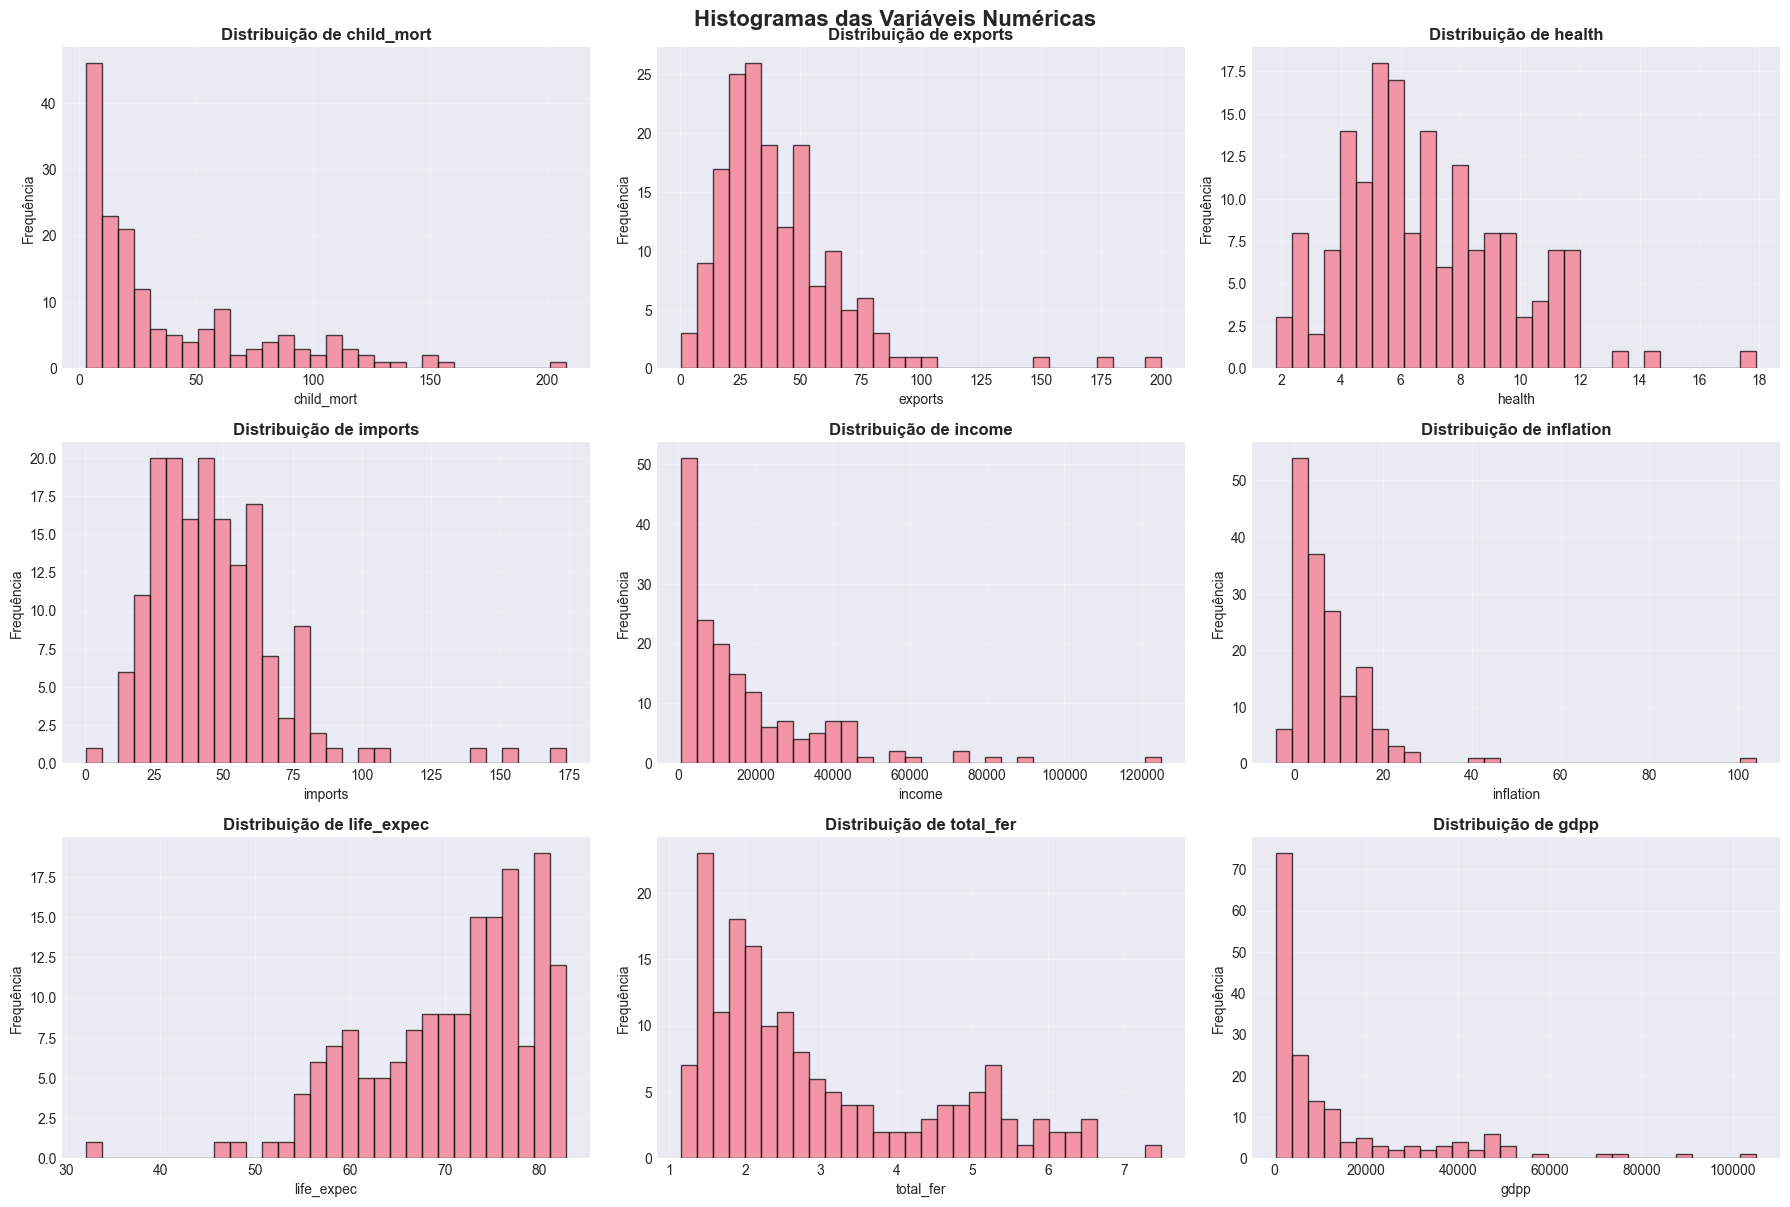

ANÁLISE DOS HISTOGRAMAS:
------------------------------------------------------------
Os histogramas mostram que as variáveis possuem:
  - Escalas muito diferentes (ex: child_mort vs exports)
  - Distribuições assimétricas (skewed)
  - Presença de outliers visíveis

CONCLUSÃO: É necessário normalizar/padronizar os dados!


In [15]:
# Histogramas de todas as variáveis numéricas
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribuição de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequência')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Histogramas das Variáveis Numéricas', fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("ANÁLISE DOS HISTOGRAMAS:")
print("-" * 60)
print("Os histogramas mostram que as variáveis possuem:")
print("  - Escalas muito diferentes (ex: child_mort vs exports)")
print("  - Distribuições assimétricas (skewed)")
print("  - Presença de outliers visíveis")
print("")
print("CONCLUSÃO: É necessário normalizar/padronizar os dados!")

### 2.5.2 Boxplots (Identificação de Outliers)

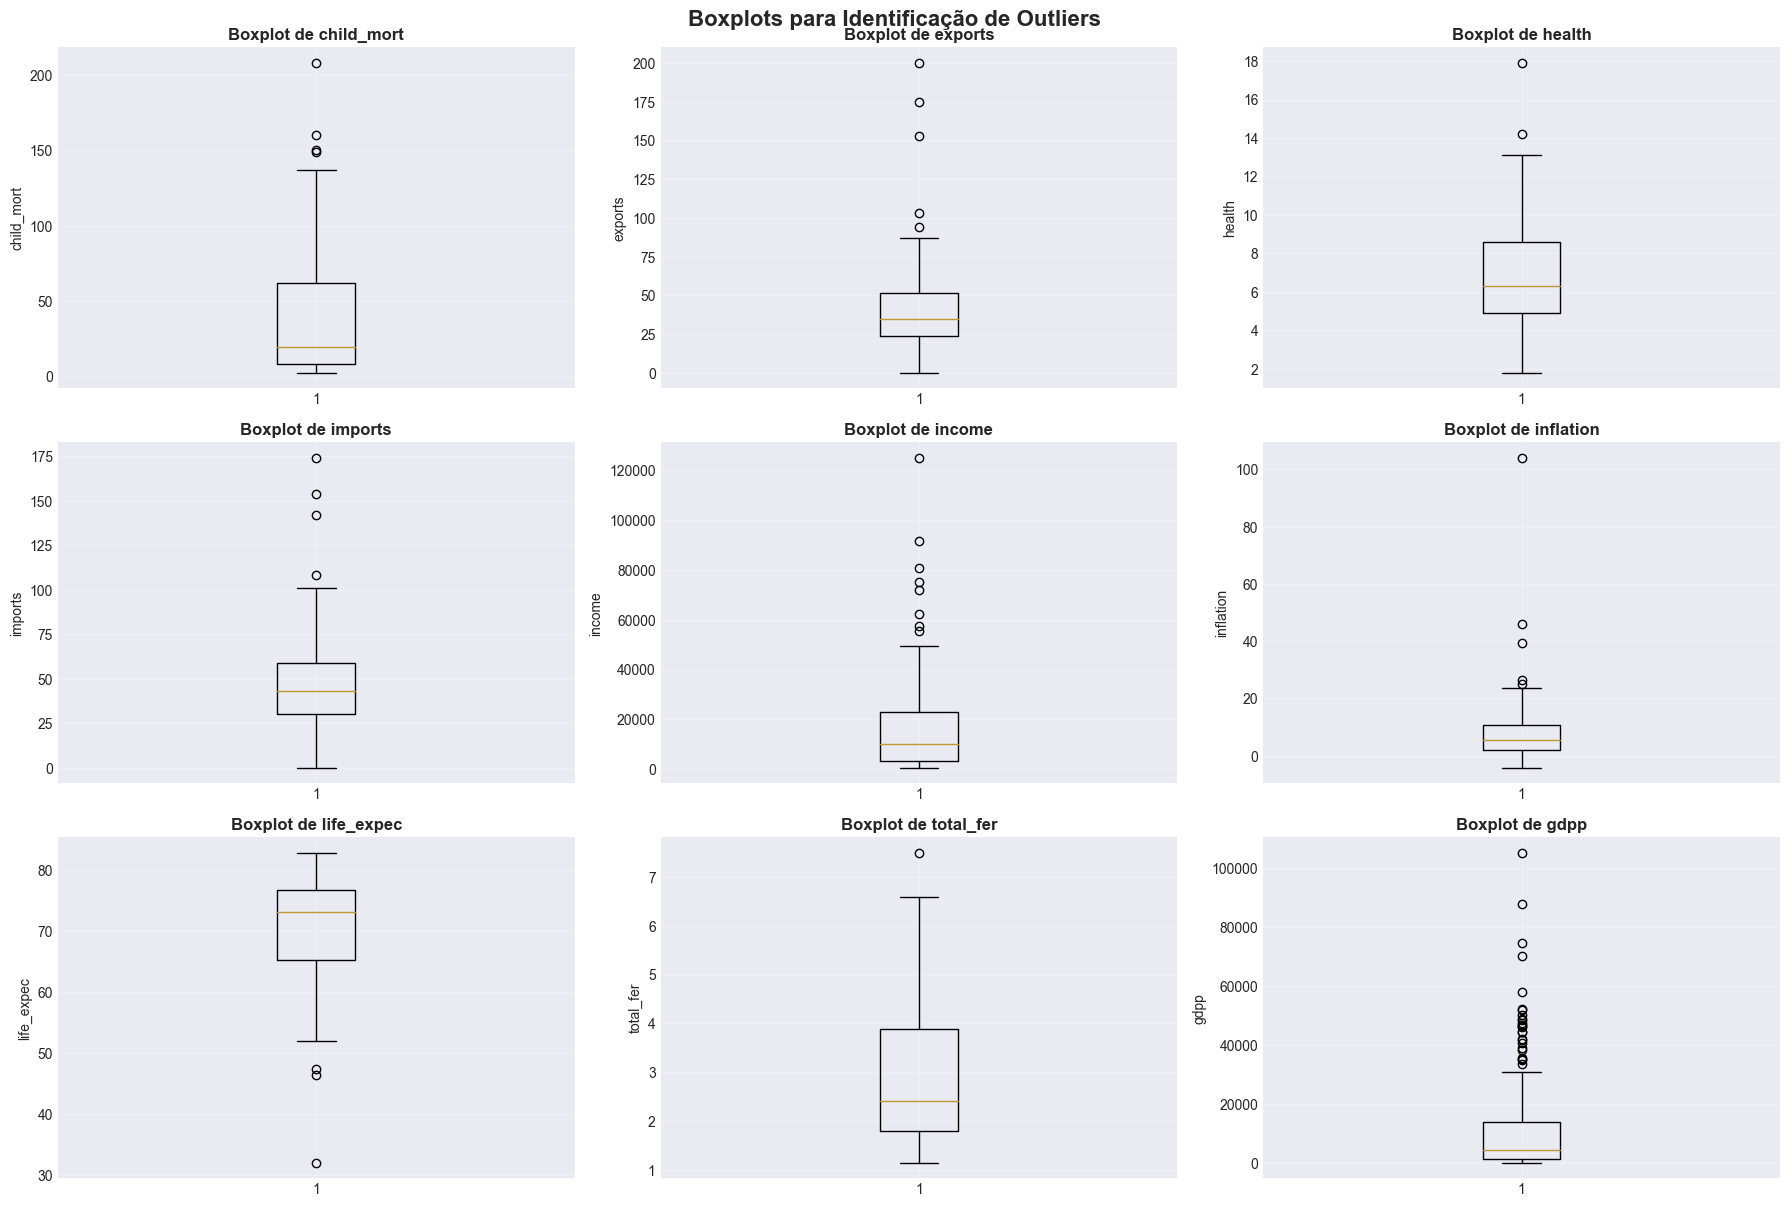


ANÁLISE DOS BOXPLOTS:
------------------------------------------------------------
Os boxplots revelam:
  • Presença significativa de outliers em várias variáveis
  • Variáveis com grande amplitude (faixa dinâmica)
  • Assimetria nas distribuições


In [17]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Boxplots para Identificação de Outliers', fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("\nANÁLISE DOS BOXPLOTS:")
print("-" * 60)
print("Os boxplots revelam:")
print("  • Presença significativa de outliers em várias variáveis")
print("  • Variáveis com grande amplitude (faixa dinâmica)")
print("  • Assimetria nas distribuições")

### 2.5.3 Matriz de Correlação

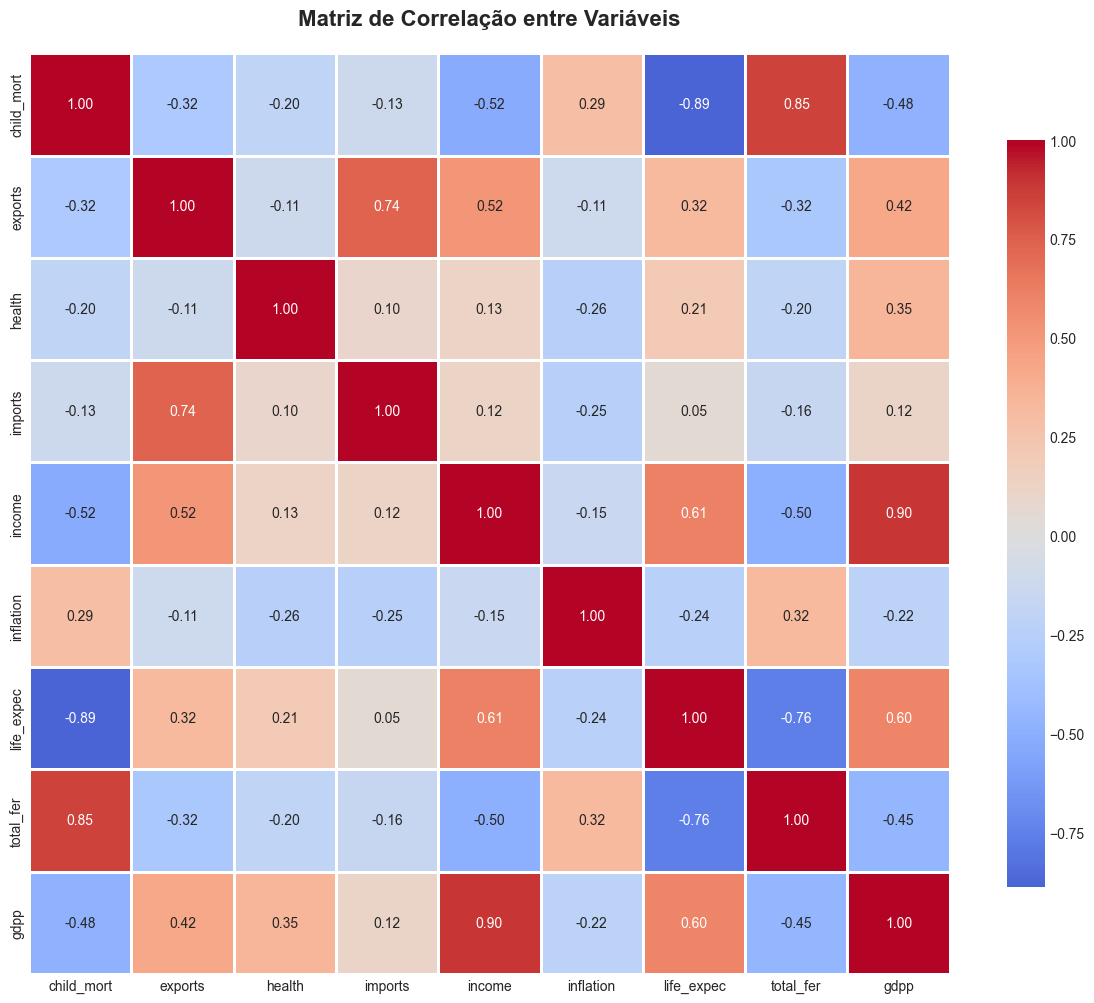


ANÁLISE DA CORRELAÇÃO:
------------------------------------------------------------
Correlações fortes identificadas:
  • child_mort ↔ life_expec: -0.887
  • child_mort ↔ total_fer: 0.848
  • exports ↔ imports: 0.737
  • income ↔ gdpp: 0.896
  • life_expec ↔ total_fer: -0.761


In [18]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Variáveis', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nANÁLISE DA CORRELAÇÃO:")
print("-" * 60)
print("Correlações fortes identificadas:")

# Encontrar correlações fortes (> 0.7 ou < -0.7)
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_corr.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

for var1, var2, corr in strong_corr:
    print(f"  • {var1} ↔ {var2}: {corr:.3f}")

### 2.5.4 Análise Detalhada das Faixas Dinâmicas

In [19]:
print("=" * 80)
print("ANÁLISE DA FAIXA DINÂMICA DAS VARIÁVEIS")
print("=" * 80)

for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()
    std_val = df[col].std()
    range_val = max_val - min_val
    
    print(f"\n{col}:")
    print(f"  Mínimo: {min_val:.2f}")
    print(f"  Máximo: {max_val:.2f}")
    print(f"  Amplitude: {range_val:.2f}")
    print(f"  Média: {mean_val:.2f}")
    print(f"  Desvio Padrão: {std_val:.2f}")

ANÁLISE DA FAIXA DINÂMICA DAS VARIÁVEIS

child_mort:
  Mínimo: 2.60
  Máximo: 208.00
  Amplitude: 205.40
  Média: 38.27
  Desvio Padrão: 40.33

exports:
  Mínimo: 0.11
  Máximo: 200.00
  Amplitude: 199.89
  Média: 41.11
  Desvio Padrão: 27.41

health:
  Mínimo: 1.81
  Máximo: 17.90
  Amplitude: 16.09
  Média: 6.82
  Desvio Padrão: 2.75

imports:
  Mínimo: 0.07
  Máximo: 174.00
  Amplitude: 173.93
  Média: 46.89
  Desvio Padrão: 24.21

income:
  Mínimo: 609.00
  Máximo: 125000.00
  Amplitude: 124391.00
  Média: 17144.69
  Desvio Padrão: 19278.07

inflation:
  Mínimo: -4.21
  Máximo: 104.00
  Amplitude: 108.21
  Média: 7.78
  Desvio Padrão: 10.57

life_expec:
  Mínimo: 32.10
  Máximo: 82.80
  Amplitude: 50.70
  Média: 70.56
  Desvio Padrão: 8.89

total_fer:
  Mínimo: 1.15
  Máximo: 7.49
  Amplitude: 6.34
  Média: 2.95
  Desvio Padrão: 1.51

gdpp:
  Mínimo: 231.00
  Máximo: 105000.00
  Amplitude: 104769.00
  Média: 12964.16
  Desvio Padrão: 18328.70


## 2.6 Conclusões da Análise Exploratória

### O que deve ser feito com os dados antes da clusterização?

**RESPOSTA:**

Baseado na análise exploratória, identificamos os seguintes problemas que precisam ser tratados:

1. **Escalas Diferentes**: As variáveis possuem escalas muito diferentes (ex: `child_mort` varia de 2.6 a 208, enquanto `exports` varia de 0.1 a 200). Isso pode fazer com que variáveis com maior magnitude dominem o cálculo de distâncias na clusterização.

2. **Presença de Outliers**: Várias variáveis apresentam outliers significativos que podem distorcer os resultados da clusterização.

3. **Distribuições Assimétricas**: Muitas variáveis não seguem uma distribuição normal, apresentando assimetria (skewness).

4. **Valores Ausentes**: Verificar se há valores ausentes que precisam ser tratados.

### Tratamentos Necessários:

- **Padronização (Standardization)**: Aplicar StandardScaler para transformar todas as variáveis para terem média 0 e desvio padrão 1. Isso é crucial para algoritmos baseados em distância como K-Means.

- **Tratamento de Valores Ausentes**: Verificar e tratar qualquer valor ausente (se houver).

- **Decisão sobre Outliers**: Manter os outliers (pois representam países reais com características extremas) mas usar padronização para reduzir seu impacto.

- **Remoção da Coluna 'country'**: Esta coluna será usada apenas como identificador, não entrará no modelo de clusterização.

## 2.7 Pré-processamento dos Dados

In [20]:
X = df[numeric_columns].copy()
paises = df['country'].copy()

print(f"Shape dos dados originais: {X.shape}")
print(f"Features: {list(X.columns)}")

Shape dos dados originais: (167, 9)
Features: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [21]:
print("\nVerificação de valores ausentes:")
print(X.isnull().sum())

if X.isnull().sum().sum() > 0:
    print("\n⚠ Valores ausentes detectados! Preenchendo com a média...")
    X = X.fillna(X.mean())
    print("✓ Valores ausentes tratados")
else:
    print("\n✓ Não há valores ausentes!")


Verificação de valores ausentes:
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

✓ Não há valores ausentes!


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_columns, index=df.index)

print("✓ Dados padronizados com sucesso!")
print(f"\nShape dos dados padronizados: {X_scaled.shape}")

✓ Dados padronizados com sucesso!

Shape dos dados padronizados: (167, 9)


In [23]:
print("\nVerificação da padronização:")
print("(As médias devem estar próximas de 0 e os desvios padrões próximos de 1)")
print("\nMédias:")
print(X_scaled_df.mean())
print("\nDesvios padrão:")
print(X_scaled_df.std())


Verificação da padronização:
(As médias devem estar próximas de 0 e os desvios padrões próximos de 1)

Médias:
child_mort   -3.722904e-17
exports       2.127373e-16
health        5.504579e-16
imports       2.765585e-16
income       -7.977650e-17
inflation    -1.063687e-17
life_expec    3.696311e-16
total_fer     3.044803e-16
gdpp          5.850277e-17
dtype: float64

Desvios padrão:
child_mort    1.003008
exports       1.003008
health        1.003008
imports       1.003008
income        1.003008
inflation     1.003008
life_expec    1.003008
total_fer     1.003008
gdpp          1.003008
dtype: float64


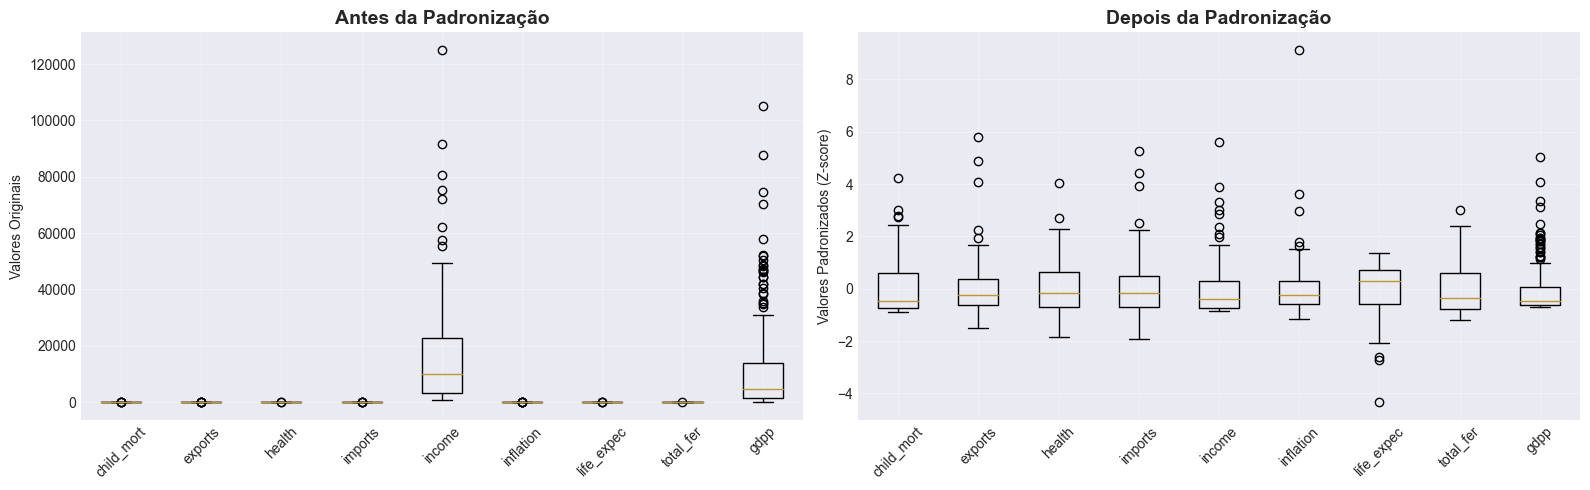


✓ Pré-processamento concluído com sucesso!

Os dados estão prontos para a clusterização.


In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Antes da padronização
axes[0].boxplot(X.values, labels=numeric_columns)
axes[0].set_title('Antes da Padronização', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valores Originais')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Depois da padronização
axes[1].boxplot(X_scaled, labels=numeric_columns)
axes[1].set_title('Depois da Padronização', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Valores Padronizados (Z-score)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Pré-processamento concluído com sucesso!")
print("\nOs dados estão prontos para a clusterização.")

---
# Parte 3: Clusterização

## 3.1 K-Means (k=3)

### 3.1.1 Aplicação do K-Means

In [25]:
# Aplicar K-Means com k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Adicionar clusters ao dataframe original
df['cluster_kmeans'] = clusters_kmeans

print("✓ K-Means aplicado com sucesso!")
print(f"\nInércia (soma das distâncias ao quadrado): {kmeans.inertia_:.2f}")
print(f"Número de iterações: {kmeans.n_iter_}")

✓ K-Means aplicado com sucesso!

Inércia (soma das distâncias ao quadrado): 831.42
Número de iterações: 19


In [26]:
# Contagem de países por cluster
print("\nDistribuição dos países por cluster:")
cluster_counts = df['cluster_kmeans'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"  Cluster {cluster}: {count} países ({count/len(df)*100:.1f}%)")


Distribuição dos países por cluster:
  Cluster 0: 36 países (21.6%)
  Cluster 1: 47 países (28.1%)
  Cluster 2: 84 países (50.3%)


### 3.1.2 Visualização dos Clusters (PCA)

In [ ]:
# Redução de dimensionalidade para visualização (PCA)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Variância explicada pelo PCA:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.2%}")

Variância explicada pelo PCA:
  PC1: 45.95%
  PC2: 17.18%
  Total: 63.13%


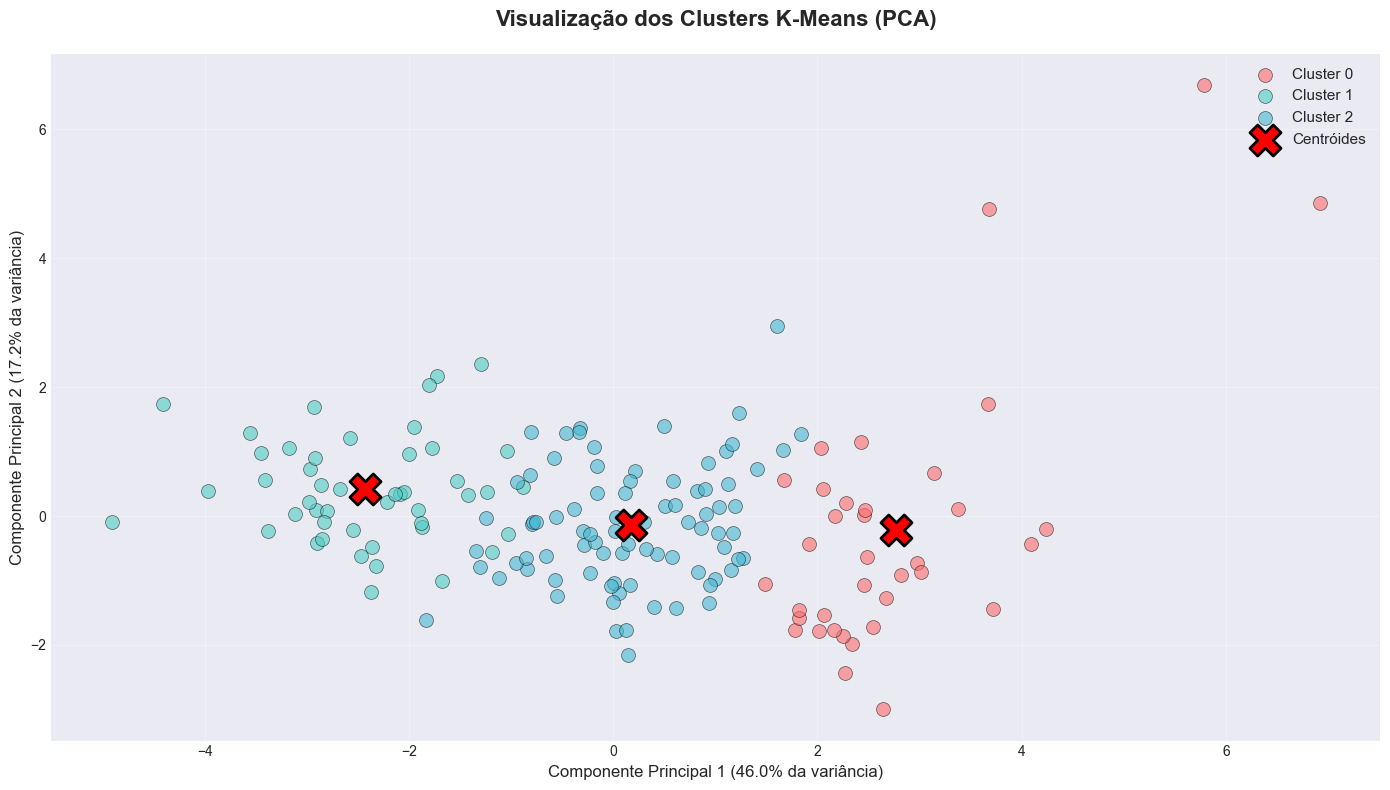

In [28]:
plt.figure(figsize=(14, 8))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for i in range(3):
    mask = clusters_kmeans == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors[i], label=cluster_names[i], 
                s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Plotar centróides
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='red', marker='X', s=500, 
            edgecolors='black', linewidth=2, 
            label='Centróides', zorder=5)

plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} da variância)', fontsize=12)
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} da variância)', fontsize=12)
plt.title('Visualização dos Clusters K-Means (PCA)', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.1.3 Interpretação dos Clusters K-Means

#### Análise da distribuição das dimensões em cada grupo

In [29]:
print("=" * 80)
print("ESTATÍSTICAS MÉDIAS POR CLUSTER (K-MEANS)")
print("=" * 80)

cluster_stats = df.groupby('cluster_kmeans')[numeric_columns].mean()
display(cluster_stats.round(2))

ESTATÍSTICAS MÉDIAS POR CLUSTER (K-MEANS)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_kmeans,,,,,,,,,
0,5.00,58.74,8.81,51.49,45672.22,2.67,80.13,1.75,42494.44
1,92.96,29.15,6.39,42.32,3942.40,12.02,59.19,5.01,1922.38
2,21.93,40.24,6.20,47.47,12305.60,7.60,72.81,2.31,6486.45


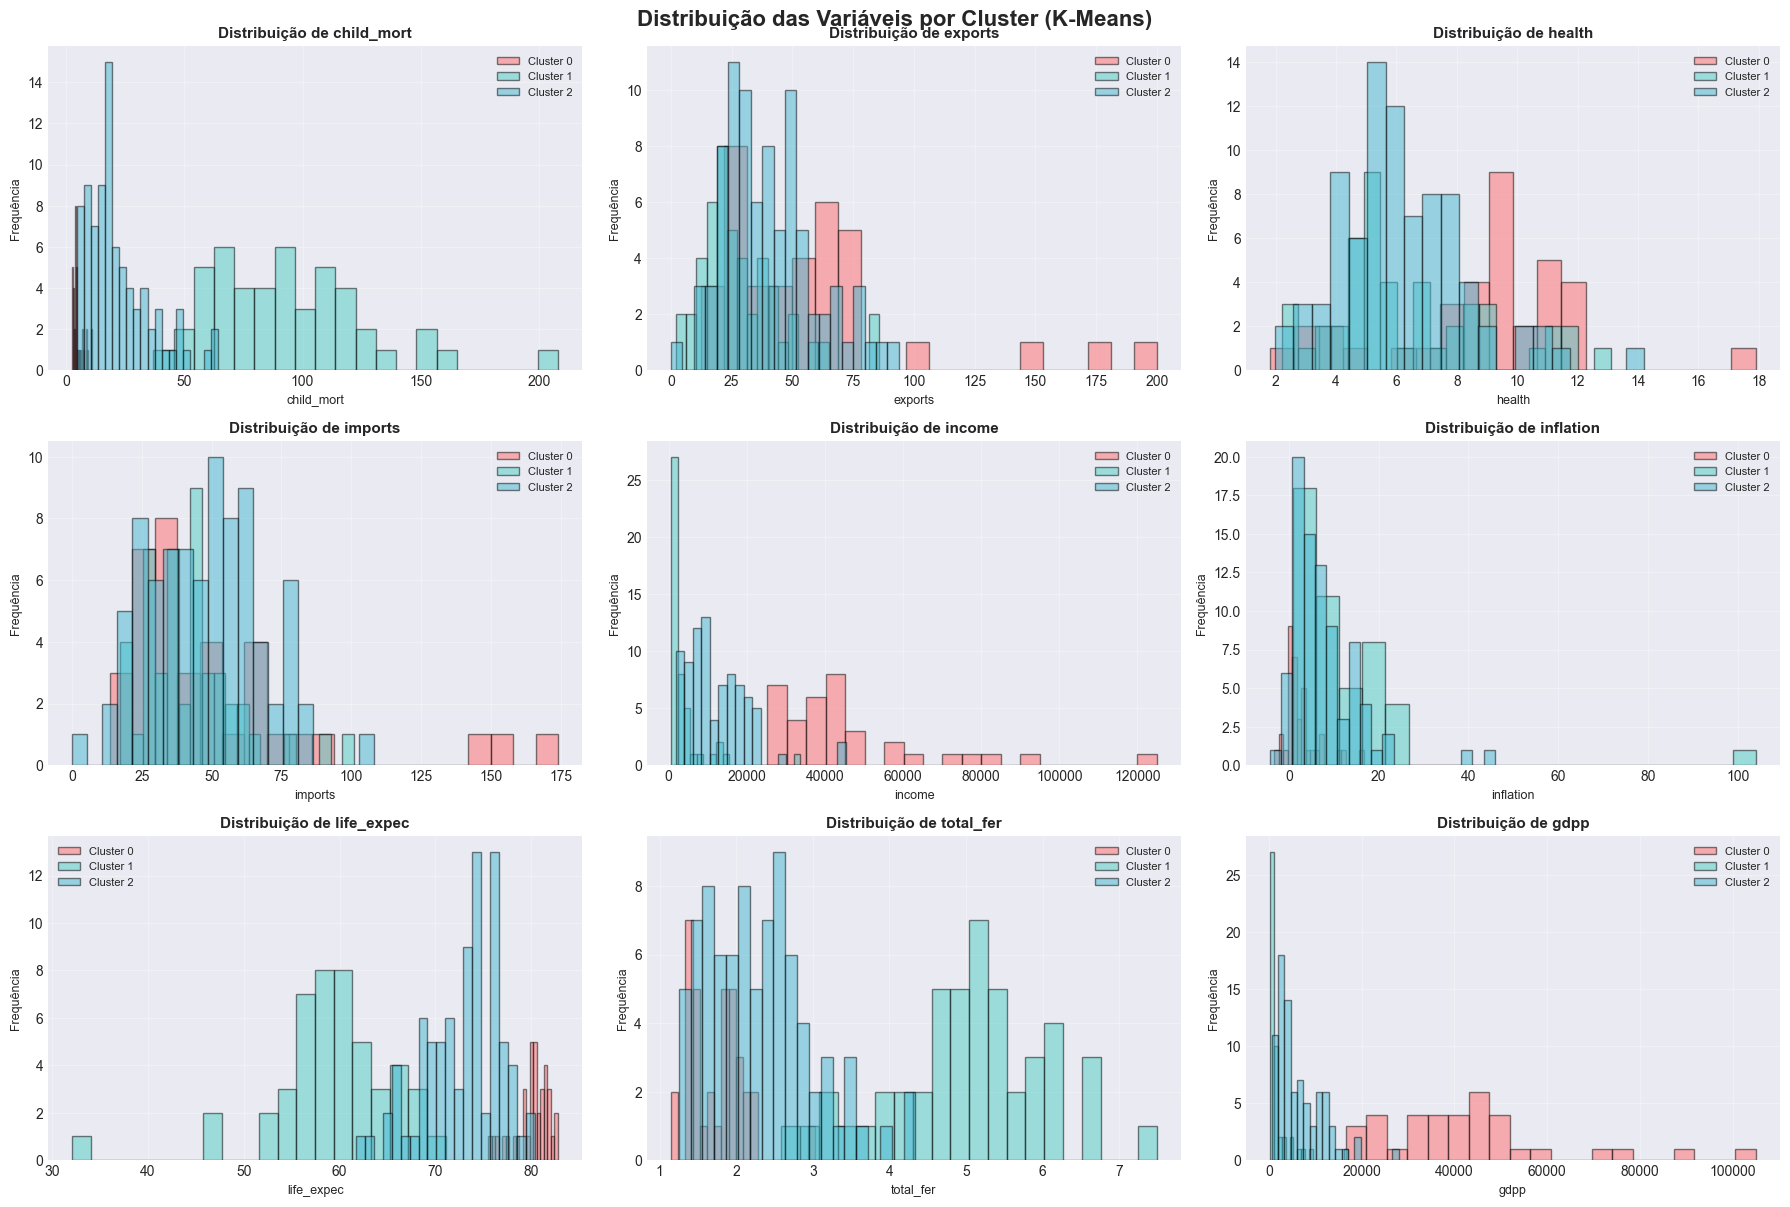

In [30]:
# Visualização das características de cada cluster
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    for cluster in range(3):
        data = df[df['cluster_kmeans'] == cluster][col]
        axes[idx].hist(data, bins=20, alpha=0.5, label=f'Cluster {cluster}', 
                      color=colors[cluster], edgecolor='black')
    
    axes[idx].set_title(f'Distribuição de {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Frequência', fontsize=9)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribuição das Variáveis por Cluster (K-Means)', 
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

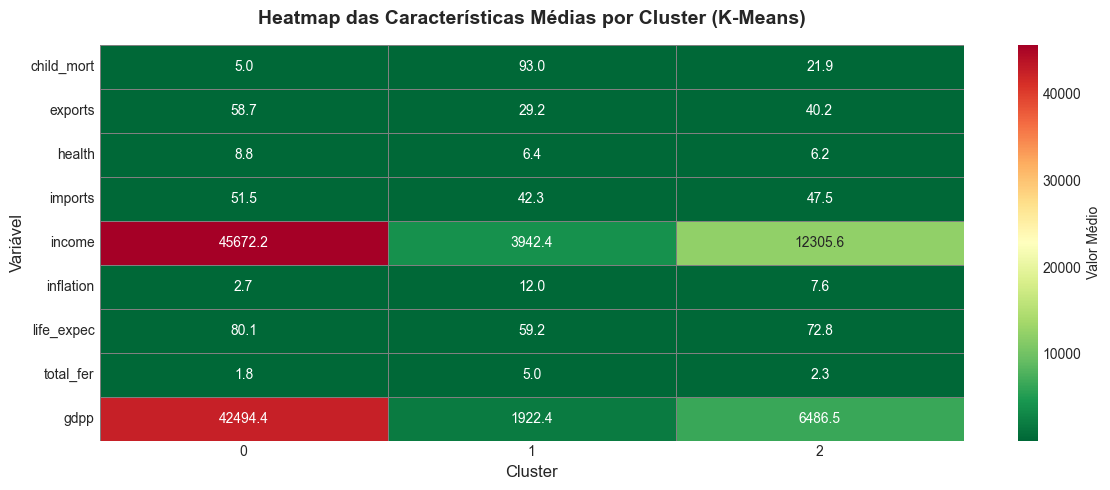

In [31]:
# Heatmap das médias por cluster
plt.figure(figsize=(12, 5))
sns.heatmap(cluster_stats.T, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Valor Médio'},
            linewidths=0.5, linecolor='gray')
plt.title('Heatmap das Características Médias por Cluster (K-Means)', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.show()

#### Interpretação Detalhada de Cada Cluster

In [33]:
# Análise detalhada de cada cluster
for cluster_id in range(3):
    print("\n" + "=" * 80)
    print(f"CLUSTER {cluster_id + 1} - ANÁLISE DETALHADA")
    print("=" * 80)
    
    cluster_data = df[df['cluster_kmeans'] == cluster_id]
    
    print(f"\nNúmero de países: {len(cluster_data)}")
    
    print(f"\nAlguns países neste cluster:")
    sample_countries = cluster_data['country'].head(10).tolist()
    for country in sample_countries:
        print(f"  • {country}")
    
    print(f"\nCaracterísticas principais:")
    cluster_means = cluster_data[numeric_columns].mean()
    
    # Comparar com média global
    global_means = df[numeric_columns].mean()
    
    for col in numeric_columns:
        cluster_val = cluster_means[col]
        global_val = global_means[col]
        diff_pct = ((cluster_val - global_val) / global_val * 100) if global_val != 0 else 0
        
        if abs(diff_pct) > 20:  # Destacar diferenças significativas
            direction = "⬆" if diff_pct > 0 else "⬇"
            print(f"  {direction} {col}: {cluster_val:.2f} ({diff_pct:+.1f}% vs média global)")


CLUSTER 1 - ANÁLISE DETALHADA

Número de países: 36

Alguns países neste cluster:
  • Australia
  • Austria
  • Bahrain
  • Belgium
  • Brunei
  • Canada
  • Cyprus
  • Czech Republic
  • Denmark
  • Finland

Características principais:
  ⬇ child_mort: 5.00 (-86.9% vs média global)
  ⬆ exports: 58.74 (+42.9% vs média global)
  ⬆ health: 8.81 (+29.2% vs média global)
  ⬆ income: 45672.22 (+166.4% vs média global)
  ⬇ inflation: 2.67 (-65.7% vs média global)
  ⬇ total_fer: 1.75 (-40.5% vs média global)
  ⬆ gdpp: 42494.44 (+227.8% vs média global)

CLUSTER 2 - ANÁLISE DETALHADA

Número de países: 47

Alguns países neste cluster:
  • Afghanistan
  • Angola
  • Benin
  • Botswana
  • Burkina Faso
  • Burundi
  • Cameroon
  • Central African Republic
  • Chad
  • Comoros

Características principais:
  ⬆ child_mort: 92.96 (+142.9% vs média global)
  ⬇ exports: 29.15 (-29.1% vs média global)
  ⬇ income: 3942.40 (-77.0% vs média global)
  ⬆ inflation: 12.02 (+54.5% vs média global)
  ⬆ total_f

#### Identificação do País Representativo de Cada Cluster

In [35]:
# Encontrar o país mais próximo do centróide de cada cluster
print("\n" + "=" * 80)
print("PAÍSES MAIS REPRESENTATIVOS DE CADA CLUSTER")
print("=" * 80)

for cluster_id in range(3):
    # Obter índices dos países neste cluster
    cluster_mask = clusters_kmeans == cluster_id
    cluster_indices = np.where(cluster_mask)[0]
    
    # Dados padronizados do cluster
    cluster_data_scaled = X_scaled[cluster_mask]
    
    # Centróide do cluster
    centroid = kmeans.cluster_centers_[cluster_id]
    
    # Calcular distância de cada país ao centróide
    distances = np.linalg.norm(cluster_data_scaled - centroid, axis=1)
    
    # Encontrar o país mais próximo
    closest_idx_in_cluster = np.argmin(distances)
    closest_idx_global = cluster_indices[closest_idx_in_cluster]
    
    representative_country = df.iloc[closest_idx_global]['country']
    min_distance = distances[closest_idx_in_cluster]
    
    print(f"\nCluster {cluster_id + 1}:")
    print(f"  País mais representativo: {representative_country}")
    print(f"  Distância ao centróide: {min_distance:.4f}")
    
    # Mostrar características do país
    print(f"  \nCaracterísticas:")
    country_data = df.iloc[closest_idx_global][numeric_columns]
    for col in numeric_columns:
        print(f"    • {col}: {country_data[col]:.2f}")
    
    print(f"  \n  Justificativa:")
    print(f"  Este país foi escolhido como representativo porque possui as características")
    print(f"  mais próximas da média (centróide) do cluster, ou seja, suas propriedades")
    print(f"  socioeconômicas e de saúde são as que melhor exemplificam o perfil típico")
    print(f"  dos países agrupados neste cluster.")


PAÍSES MAIS REPRESENTATIVOS DE CADA CLUSTER

Cluster 1:
  País mais representativo: Iceland
  Distância ao centróide: 0.7318
  
Características:
    • child_mort: 2.60
    • exports: 53.40
    • health: 9.40
    • imports: 43.30
    • income: 38800.00
    • inflation: 5.47
    • life_expec: 82.00
    • total_fer: 2.20
    • gdpp: 41900.00
  
  Justificativa:
  Este país foi escolhido como representativo porque possui as características
  mais próximas da média (centróide) do cluster, ou seja, suas propriedades
  socioeconômicas e de saúde são as que melhor exemplificam o perfil típico
  dos países agrupados neste cluster.

Cluster 2:
  País mais representativo: Guinea
  Distância ao centróide: 0.8291
  
Características:
    • child_mort: 109.00
    • exports: 30.30
    • health: 4.93
    • imports: 43.20
    • income: 1190.00
    • inflation: 16.10
    • life_expec: 58.00
    • total_fer: 5.34
    • gdpp: 648.00
  
  Justificativa:
  Este país foi escolhido como representativo porque 

#### Perfil de Cada Cluster

In [36]:
# Criar perfil interpretativo de cada cluster
print("\n" + "=" * 80)
print("PERFIS INTERPRETATIVOS DOS CLUSTERS (K-MEANS)")
print("=" * 80)

# Analisar cluster 1
cluster0_means = df[df['cluster_kmeans'] == 0][numeric_columns].mean()
print("\n📊 CLUSTER 1:")
print("-" * 80)
if cluster0_means['child_mort'] < 20 and cluster0_means['gdpp'] > 15000:
    print("PERFIL: PAÍSES DESENVOLVIDOS")
    print("  • Alta expectativa de vida")
    print("  • Baixa mortalidade infantil")
    print("  • Alto PIB per capita")
    print("  • Boa infraestrutura de saúde")
    print("  • Exemplos típicos: países europeus, EUA, Canadá, Austrália, etc.")
elif cluster0_means['child_mort'] > 80:
    print("PERFIL: PAÍSES EM DESENVOLVIMENTO INICIAL")
    print("  • Alta mortalidade infantil")
    print("  • Baixa expectativa de vida")
    print("  • Baixo PIB per capita")
    print("  • Infraestrutura de saúde precária")
    print("  • Exemplos típicos: países africanos subsaarianos")
else:
    print("PERFIL: PAÍSES EM DESENVOLVIMENTO INTERMEDIÁRIO")
    print("  • Indicadores socioeconômicos intermediários")
    print("  • Em transição econômica")
    print("  • Infraestrutura em desenvolvimento")

# Analisar cluster 2
cluster1_means = df[df['cluster_kmeans'] == 1][numeric_columns].mean()
print("\n📊 CLUSTER 2:")
print("-" * 80)
if cluster1_means['child_mort'] < 20 and cluster1_means['gdpp'] > 15000:
    print("PERFIL: PAÍSES DESENVOLVIDOS")
    print("  • Alta expectativa de vida")
    print("  • Baixa mortalidade infantil")
    print("  • Alto PIB per capita")
    print("  • Boa infraestrutura de saúde")
elif cluster1_means['child_mort'] > 80:
    print("PERFIL: PAÍSES EM DESENVOLVIMENTO INICIAL")
    print("  • Alta mortalidade infantil")
    print("  • Baixa expectativa de vida")
    print("  • Baixo PIB per capita")
    print("  • Infraestrutura de saúde precária")
else:
    print("PERFIL: PAÍSES EM DESENVOLVIMENTO INTERMEDIÁRIO")
    print("  • Indicadores socioeconômicos intermediários")
    print("  • Em transição econômica")
    print("  • Infraestrutura em desenvolvimento")

# Analisar cluster 3
cluster2_means = df[df['cluster_kmeans'] == 2][numeric_columns].mean()
print("\n📊 CLUSTER 3:")
print("-" * 80)
if cluster2_means['child_mort'] < 20 and cluster2_means['gdpp'] > 15000:
    print("PERFIL: PAÍSES DESENVOLVIDOS")
    print("  • Alta expectativa de vida")
    print("  • Baixa mortalidade infantil")
    print("  • Alto PIB per capita")
    print("  • Boa infraestrutura de saúde")
elif cluster2_means['child_mort'] > 80:
    print("PERFIL: PAÍSES EM DESENVOLVIMENTO INICIAL")
    print("  • Alta mortalidade infantil")
    print("  • Baixa expectativa de vida")
    print("  • Baixo PIB per capita")
    print("  • Infraestrutura de saúde precária")
else:
    print("PERFIL: PAÍSES EM DESENVOLVIMENTO INTERMEDIÁRIO")
    print("  • Indicadores socioeconômicos intermediários")
    print("  • Em transição econômica")
    print("  • Infraestrutura em desenvolvimento")


PERFIS INTERPRETATIVOS DOS CLUSTERS (K-MEANS)

📊 CLUSTER 1:
--------------------------------------------------------------------------------
PERFIL: PAÍSES DESENVOLVIDOS
  • Alta expectativa de vida
  • Baixa mortalidade infantil
  • Alto PIB per capita
  • Boa infraestrutura de saúde
  • Exemplos típicos: países europeus, EUA, Canadá, Austrália, etc.

📊 CLUSTER 2:
--------------------------------------------------------------------------------
PERFIL: PAÍSES EM DESENVOLVIMENTO INICIAL
  • Alta mortalidade infantil
  • Baixa expectativa de vida
  • Baixo PIB per capita
  • Infraestrutura de saúde precária

📊 CLUSTER 3:
--------------------------------------------------------------------------------
PERFIL: PAÍSES EM DESENVOLVIMENTO INTERMEDIÁRIO
  • Indicadores socioeconômicos intermediários
  • Em transição econômica
  • Infraestrutura em desenvolvimento


## 3.2 Clusterização Hierárquica

### 3.2.1 Aplicação da Clusterização Hierárquica

In [37]:
# Aplicar Clusterização Hierárquica com 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(X_scaled)

# Adicionar clusters ao dataframe
df['cluster_hierarchical'] = clusters_hierarchical

print("✓ Clusterização Hierárquica aplicada com sucesso!")
print("\nMétodo de ligação: Ward (minimiza a variância dentro dos clusters)")

✓ Clusterização Hierárquica aplicada com sucesso!

Método de ligação: Ward (minimiza a variância dentro dos clusters)


In [38]:
# Contagem de países por cluster
print("\nDistribuição dos países por cluster:")
cluster_counts_hier = df['cluster_hierarchical'].value_counts().sort_index()
for cluster, count in cluster_counts_hier.items():
    print(f"  Cluster {cluster}: {count} países ({count/len(df)*100:.1f}%)")


Distribuição dos países por cluster:
  Cluster 0: 34 países (20.4%)
  Cluster 1: 106 países (63.5%)
  Cluster 2: 27 países (16.2%)


### 3.2.2 Dendrograma

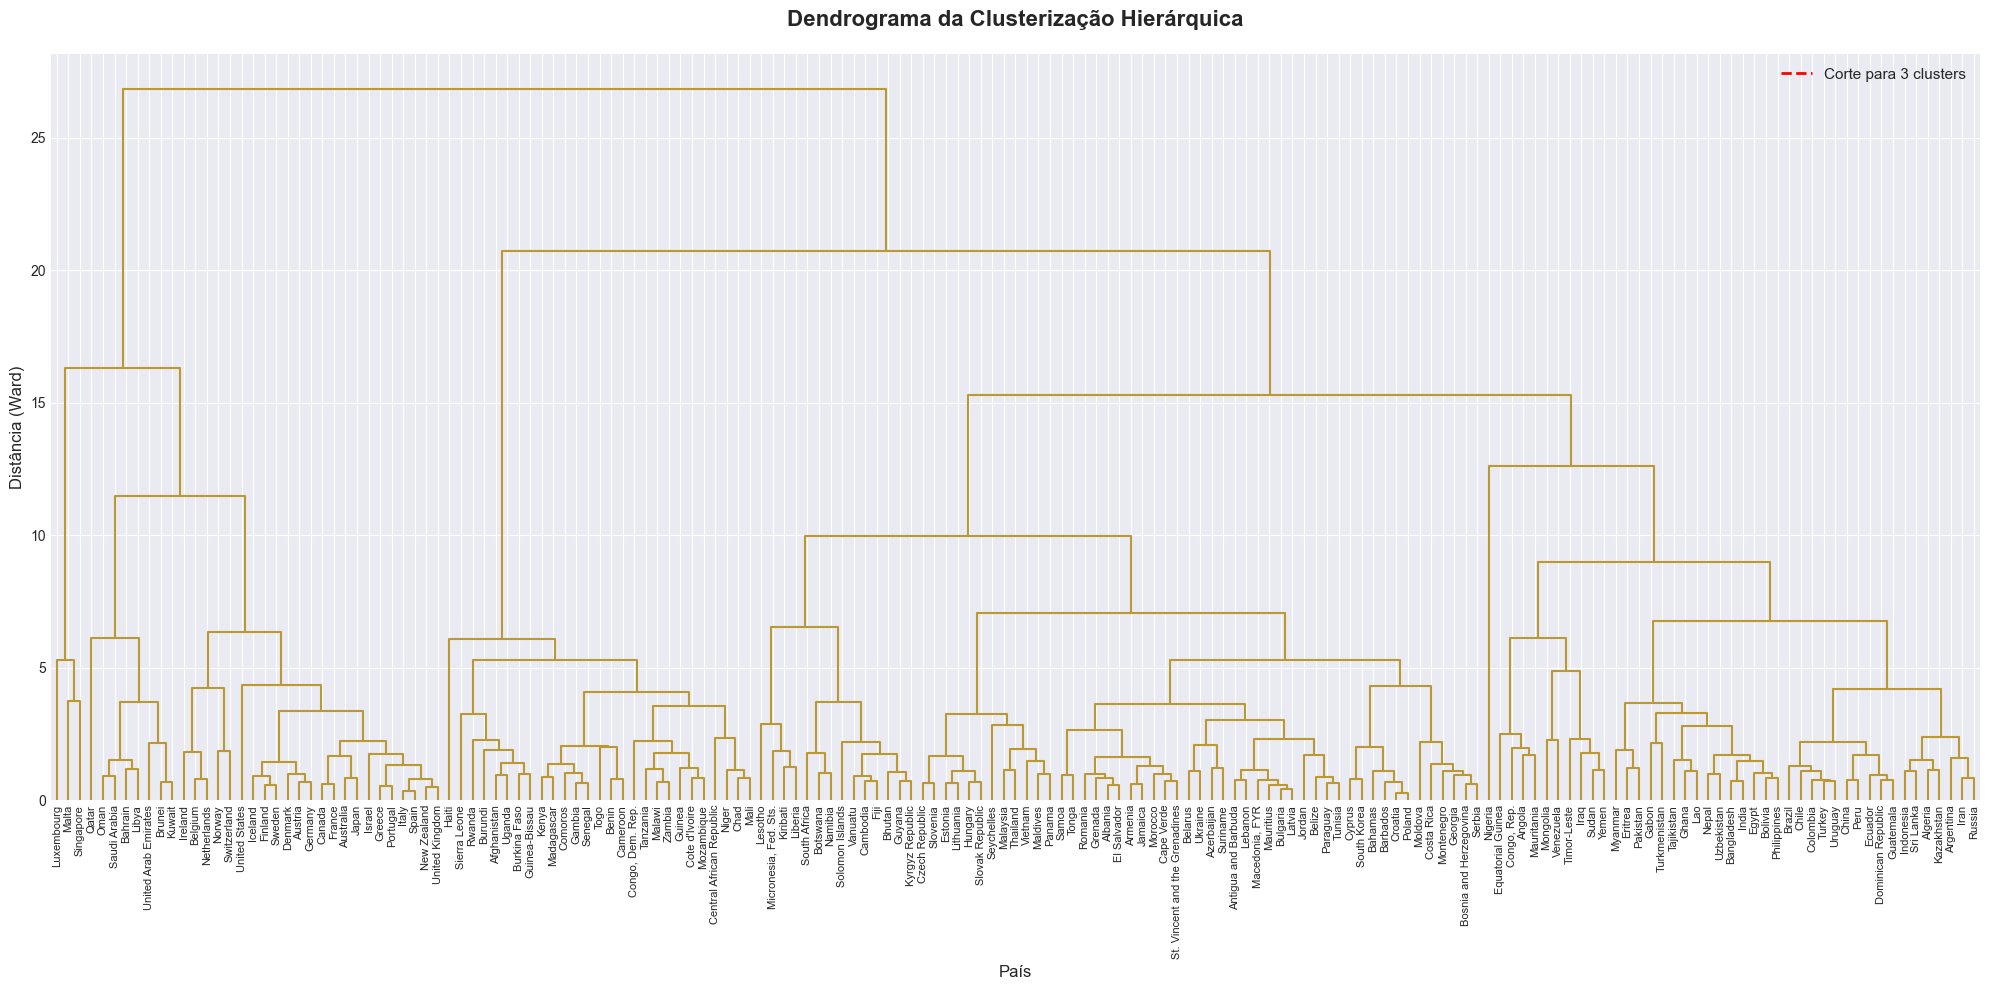

In [39]:
# Calcular linkage para o dendrograma
linkage_matrix = linkage(X_scaled, method='ward')

# Plotar dendrograma
plt.figure(figsize=(20, 10))
dendrogram(
    linkage_matrix,
    labels=df['country'].values,
    leaf_font_size=8,
    leaf_rotation=90,
    color_threshold=100
)
plt.title('Dendrograma da Clusterização Hierárquica', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('País', fontsize=12)
plt.ylabel('Distância (Ward)', fontsize=12)
plt.axhline(y=100, color='r', linestyle='--', linewidth=2, label='Corte para 3 clusters')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

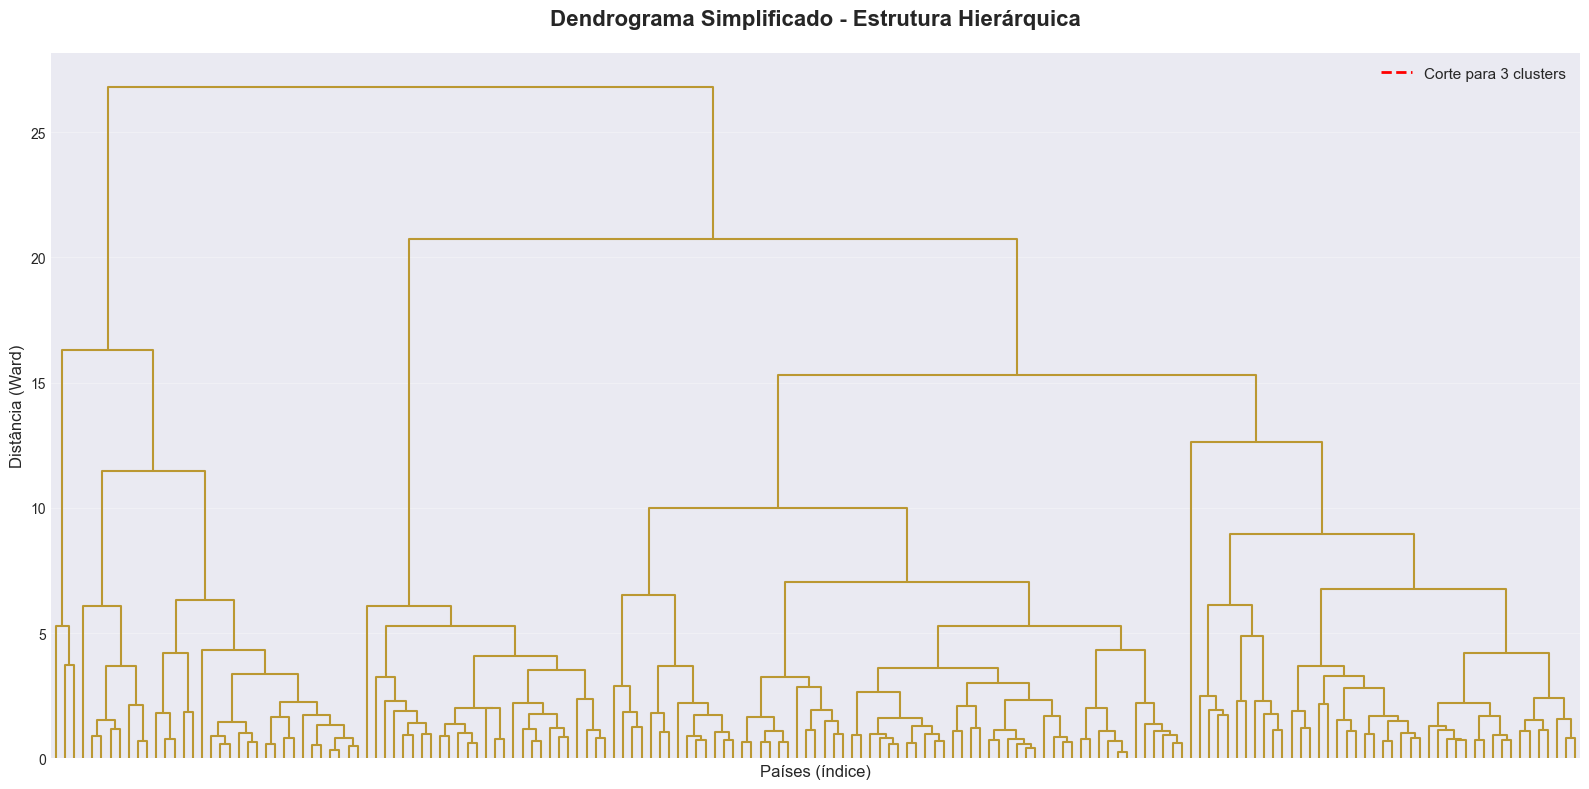

In [40]:
# Dendrograma simplificado (sem labels para melhor visualização da estrutura)
plt.figure(figsize=(16, 8))
dendrogram(
    linkage_matrix,
    no_labels=True,
    color_threshold=100
)
plt.title('Dendrograma Simplificado - Estrutura Hierárquica', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Países (índice)', fontsize=12)
plt.ylabel('Distância (Ward)', fontsize=12)
plt.axhline(y=100, color='r', linestyle='--', linewidth=2, label='Corte para 3 clusters')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 3.2.3 Interpretação do Dendrograma

**INTERPRETAÇÃO DO DENDROGRAMA:**

O dendrograma é uma representação visual do processo de agrupamento hierárquico. Principais observações:

1. **Estrutura Hierárquica**: 
   - O eixo Y representa a distância (ou dissimilaridade) entre clusters
   - Quanto mais alto a junção entre dois grupos, mais diferentes eles são
   - Países que se juntam em níveis mais baixos são mais similares entre si

2. **Formação dos Clusters**:
   - A linha vermelha tracejada indica onde cortamos a árvore para obter 3 clusters
   - Abaixo deste corte, temos os 3 grupos principais
   - Cada cluster tem sua própria subestrutura hierárquica

3. **Análise da Distância**:
   - Distâncias pequenas (próximas à base) indicam países muito similares
   - Distâncias grandes (próximas ao topo) indicam diferenças significativas
   - O método Ward minimiza a variância dentro de cada cluster

4. **Comparação com K-Means**:
   - Diferente do K-Means, a clusterização hierárquica mostra a relação entre grupos
   - Podemos ver sub-grupos dentro de cada cluster principal
   - A estrutura em árvore permite escolher diferentes números de clusters

5. **Insights**:
   - Podemos identificar "outliers" - países que se juntam muito tarde
   - Sub-grupos naturais são revelados pela estrutura da árvore
   - A altura da junção indica o grau de similaridade

In [41]:
# Análise quantitativa do dendrograma
print("\n" + "=" * 80)
print("ANÁLISE QUANTITATIVA DA HIERARQUIA")
print("=" * 80)

# Últimas fusões (mais significativas)
print("\nÚltimas 10 fusões (maiores distâncias):")
last_merges = linkage_matrix[-10:, 2]
for i, dist in enumerate(reversed(last_merges), 1):
    print(f"  Fusão {i}: distância = {dist:.2f}")

# Distância média de fusão
mean_distance = linkage_matrix[:, 2].mean()
print(f"\nDistância média de fusão: {mean_distance:.2f}")


ANÁLISE QUANTITATIVA DA HIERARQUIA

Últimas 10 fusões (maiores distâncias):
  Fusão 1: distância = 26.82
  Fusão 2: distância = 20.73
  Fusão 3: distância = 16.29
  Fusão 4: distância = 15.29
  Fusão 5: distância = 12.62
  Fusão 6: distância = 11.48
  Fusão 7: distância = 9.98
  Fusão 8: distância = 8.97
  Fusão 9: distância = 7.06
  Fusão 10: distância = 6.75

Distância média de fusão: 2.51


### 3.2.4 Visualização dos Clusters Hierárquicos

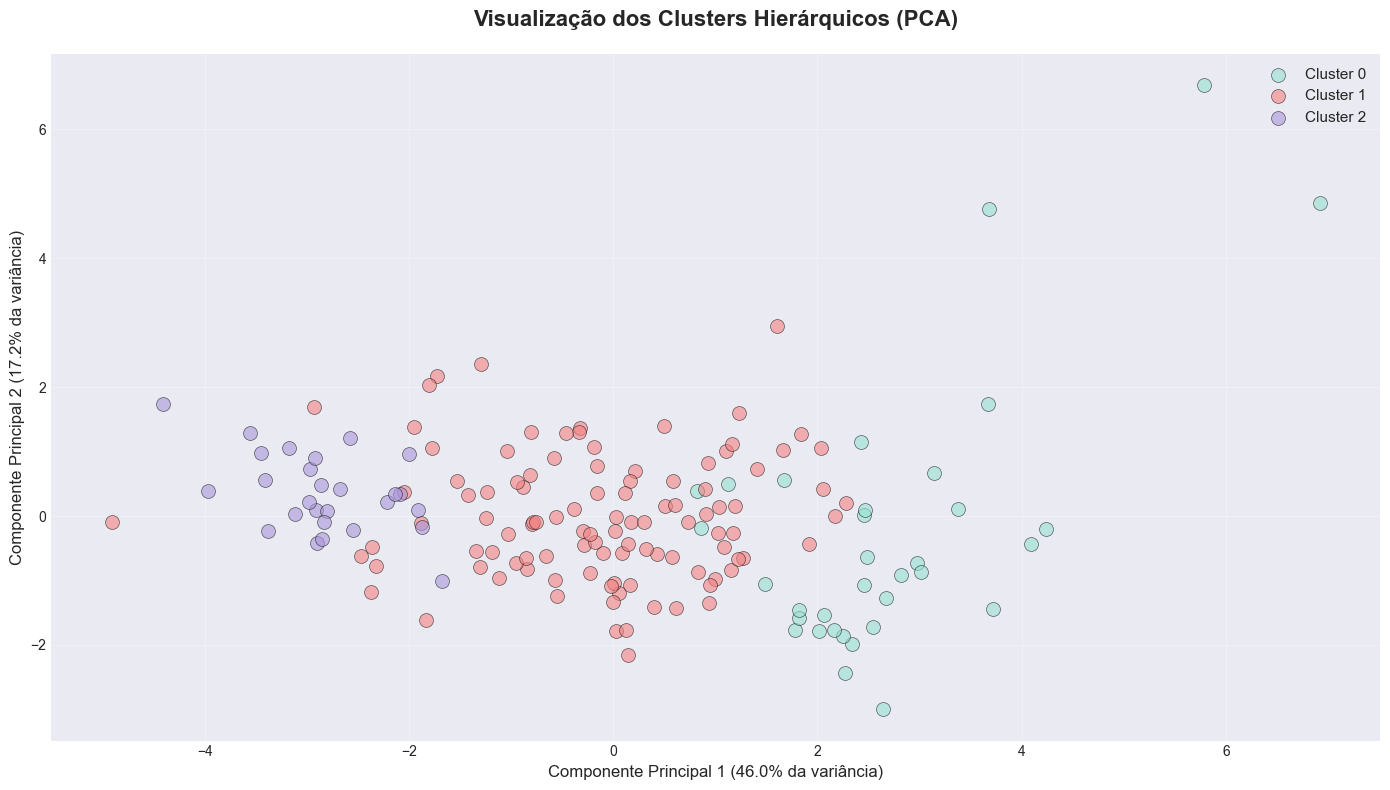

In [42]:
# Visualização dos clusters hierárquicos no espaço PCA
plt.figure(figsize=(14, 8))

colors_hier = ['#95E1D3', '#F38181', '#AA96DA']
cluster_names_hier = ['Cluster 0', 'Cluster 1', 'Cluster 2']

for i in range(3):
    mask = clusters_hierarchical == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors_hier[i], label=cluster_names_hier[i], 
                s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} da variância)', fontsize=12)
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} da variância)', fontsize=12)
plt.title('Visualização dos Clusters Hierárquicos (PCA)', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
# Estatísticas por cluster hierárquico
print("\n" + "=" * 80)
print("ESTATÍSTICAS MÉDIAS POR CLUSTER (HIERÁRQUICO)")
print("=" * 80)

cluster_stats_hier = df.groupby('cluster_hierarchical')[numeric_columns].mean()
display(cluster_stats_hier.round(2))


ESTATÍSTICAS MÉDIAS POR CLUSTER (HIERÁRQUICO)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_hierarchical,,,,,,,,,
0,5.96,58.51,8.50,48.90,47588.24,4.12,79.98,1.89,43170.59
1,31.62,39.99,6.35,48.09,11341.89,9.12,70.92,2.65,6407.37
2,105.07,23.59,6.51,39.66,1589.74,7.14,57.25,5.43,667.89


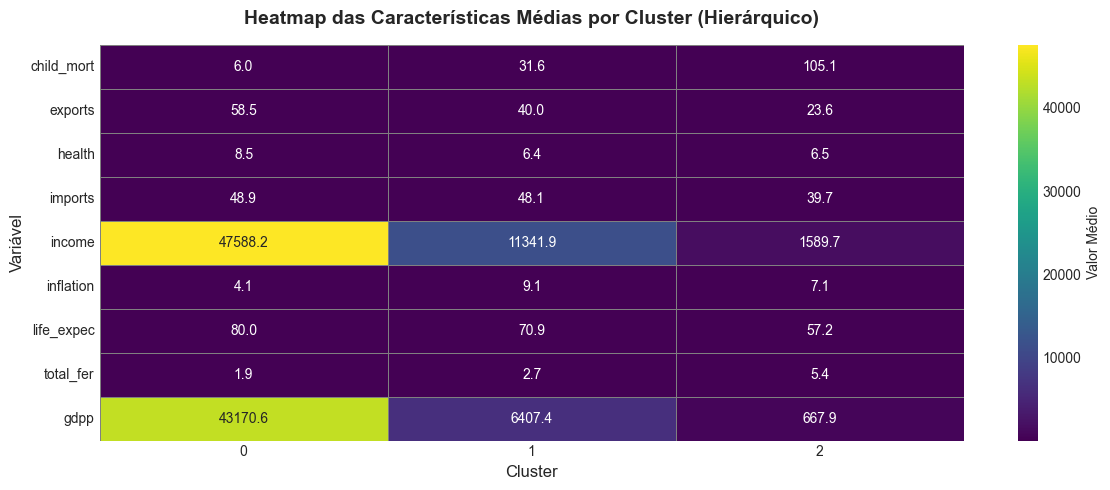

In [44]:
# Heatmap das médias por cluster hierárquico
plt.figure(figsize=(12, 5))
sns.heatmap(cluster_stats_hier.T, annot=True, fmt='.1f', cmap='viridis', 
            cbar_kws={'label': 'Valor Médio'},
            linewidths=0.5, linecolor='gray')
plt.title('Heatmap das Características Médias por Cluster (Hierárquico)', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.show()

## 3.3 Comparação entre K-Means e Clusterização Hierárquica

### 3.3.1 Comparação Visual

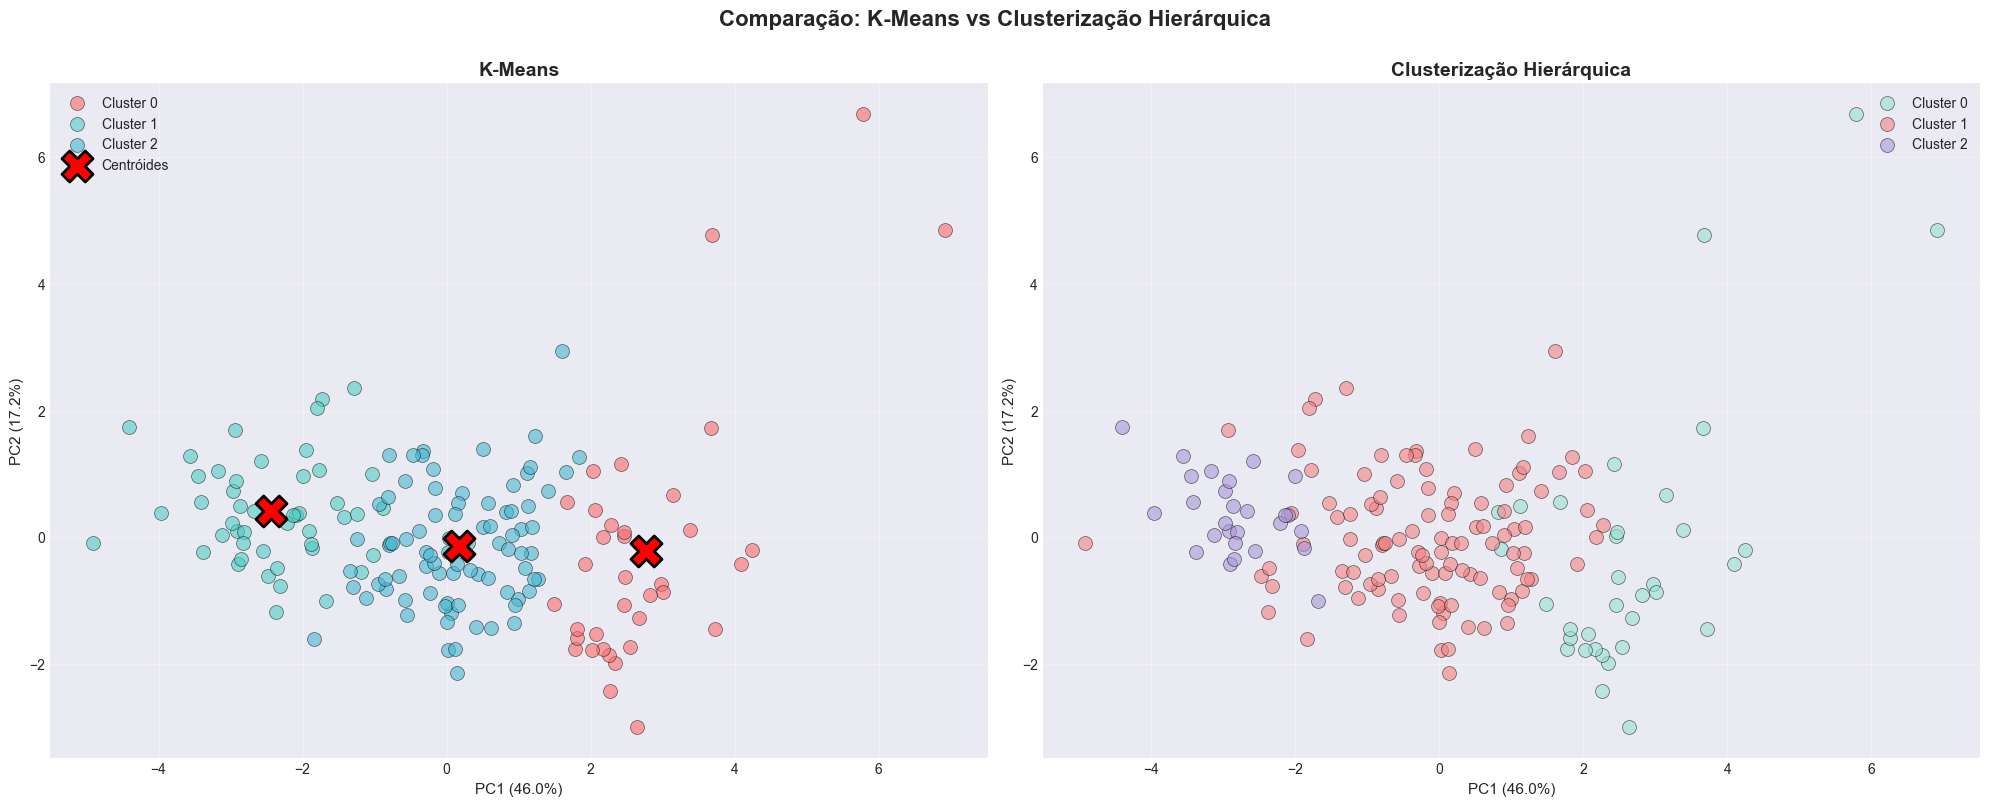

In [45]:
# Comparação lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# K-Means
for i in range(3):
    mask = clusters_kmeans == i
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                    c=colors[i], label=f'Cluster {i}', 
                    s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
                c='red', marker='X', s=500, 
                edgecolors='black', linewidth=2, 
                label='Centróides', zorder=5)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
axes[0].set_title('K-Means', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Hierárquico
for i in range(3):
    mask = clusters_hierarchical == i
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                    c=colors_hier[i], label=f'Cluster {i}', 
                    s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
axes[1].set_title('Clusterização Hierárquica', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.suptitle('Comparação: K-Means vs Clusterização Hierárquica', 
             fontsize=16, fontweight='bold', y=1.002)
plt.tight_layout()
plt.show()

### 3.3.2 Concordância entre os Algoritmos

Matriz de Contingência (Concordância entre algoritmos):

Cada célula mostra quantos países foram agrupados no mesmo cluster
por ambos os algoritmos.



Hierárquico,0,1,2
K-Means,,,
0,31,5,0
1,0,20,27
2,3,81,0


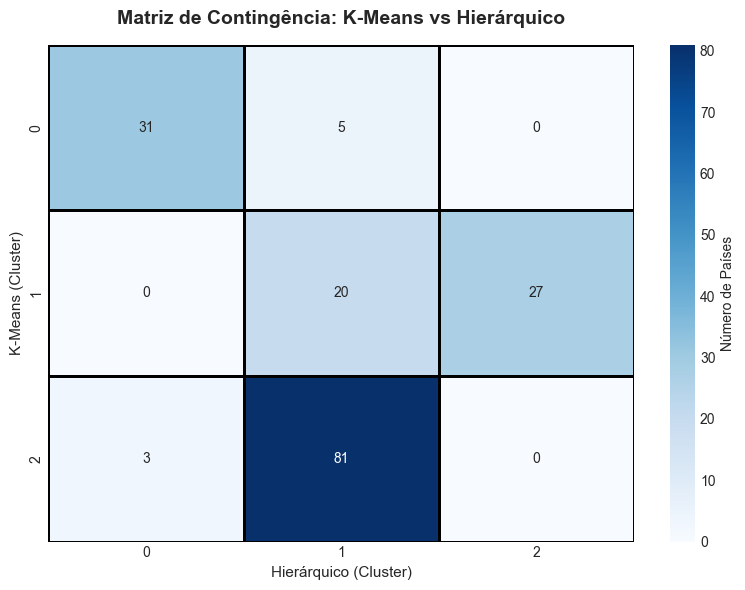

In [46]:
# Matriz de contingência
contingency_matrix = pd.crosstab(
    df['cluster_kmeans'], 
    df['cluster_hierarchical'],
    rownames=['K-Means'],
    colnames=['Hierárquico']
)

print("Matriz de Contingência (Concordância entre algoritmos):")
print("\nCada célula mostra quantos países foram agrupados no mesmo cluster")
print("por ambos os algoritmos.\n")
display(contingency_matrix)

# Visualizar matriz de contingência
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_matrix, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Número de Países'},
            linewidths=1, linecolor='black')
plt.title('Matriz de Contingência: K-Means vs Hierárquico', 
          fontsize=14, fontweight='bold', pad=15)
plt.ylabel('K-Means (Cluster)', fontsize=11)
plt.xlabel('Hierárquico (Cluster)', fontsize=11)
plt.tight_layout()
plt.show()

In [47]:
# Adjusted Rand Index (mede a similaridade entre os agrupamentos)
ari = adjusted_rand_score(clusters_kmeans, clusters_hierarchical)

print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")
print("\nInterpretação do ARI:")
print("  • ARI = 1.0: Agrupamentos idênticos")
print("  • ARI = 0.0: Agrupamentos aleatórios")
print("  • ARI < 0.0: Pior que aleatório")
print("")

if ari > 0.8:
    print("  ✓ Concordância MUITO ALTA entre os algoritmos")
elif ari > 0.6:
    print("  ✓ Concordância ALTA entre os algoritmos")
elif ari > 0.4:
    print("  ~ Concordância MODERADA entre os algoritmos")
elif ari > 0.2:
    print("  ⚠ Concordância BAIXA entre os algoritmos")
else:
    print("  ⚠ Concordância MUITO BAIXA entre os algoritmos")


Adjusted Rand Index (ARI): 0.5370

Interpretação do ARI:
  • ARI = 1.0: Agrupamentos idênticos
  • ARI = 0.0: Agrupamentos aleatórios
  • ARI < 0.0: Pior que aleatório

  ~ Concordância MODERADA entre os algoritmos


### 3.3.3 Análise Comparativa Detalhada

In [48]:
# Silhouette Score (mede a qualidade dos clusters)
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)
silhouette_hier = silhouette_score(X_scaled, clusters_hierarchical)

print("\n" + "=" * 80)
print("MÉTRICAS DE QUALIDADE DOS CLUSTERS")
print("=" * 80)
print(f"\nSilhouette Score:")
print(f"  K-Means:           {silhouette_kmeans:.4f}")
print(f"  Hierárquico:       {silhouette_hier:.4f}")
print("")
print("Interpretação do Silhouette Score:")
print("  • Valores próximos a +1: excelente separação")
print("  • Valores próximos a 0: clusters sobrepostos")
print("  • Valores próximos a -1: pontos podem estar no cluster errado")
print("")

if silhouette_kmeans > silhouette_hier:
    diff = silhouette_kmeans - silhouette_hier
    print(f"  ➜ K-Means apresenta melhor separação (+{diff:.4f})")
elif silhouette_hier > silhouette_kmeans:
    diff = silhouette_hier - silhouette_kmeans
    print(f"  ➜ Hierárquico apresenta melhor separação (+{diff:.4f})")
else:
    print(f"  ➜ Ambos apresentam separação equivalente")


MÉTRICAS DE QUALIDADE DOS CLUSTERS

Silhouette Score:
  K-Means:           0.2833
  Hierárquico:       0.2456

Interpretação do Silhouette Score:
  • Valores próximos a +1: excelente separação
  • Valores próximos a 0: clusters sobrepostos
  • Valores próximos a -1: pontos podem estar no cluster errado

  ➜ K-Means apresenta melhor separação (+0.0377)



DISTRIBUIÇÃO DE PAÍSES POR CLUSTER


,K-Means,Hierárquico
0,36,34
1,47,106
2,84,27


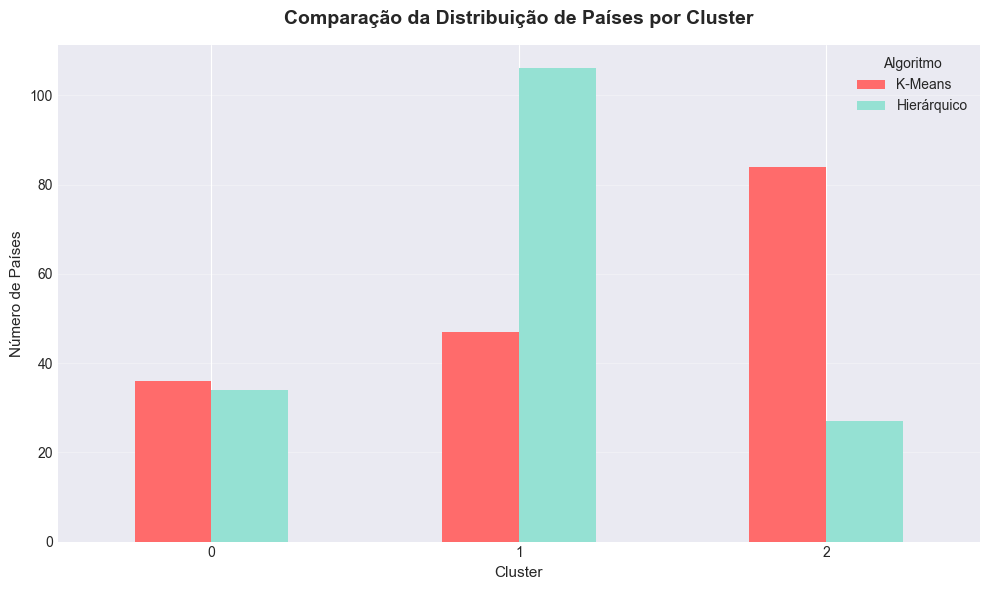

In [49]:
# Comparação das distribuições
comparison_df = pd.DataFrame({
    'K-Means': df['cluster_kmeans'].value_counts().sort_index(),
    'Hierárquico': df['cluster_hierarchical'].value_counts().sort_index()
})

print("\n" + "=" * 80)
print("DISTRIBUIÇÃO DE PAÍSES POR CLUSTER")
print("=" * 80)
display(comparison_df)

# Gráfico de barras comparativo
comparison_df.plot(kind='bar', figsize=(10, 6), color=['#FF6B6B', '#95E1D3'])
plt.title('Comparação da Distribuição de Países por Cluster', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Cluster', fontsize=11)
plt.ylabel('Número de Países', fontsize=11)
plt.xticks(rotation=0)
plt.legend(title='Algoritmo', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 3.3.4 Interpretação Final: Semelhanças e Diferenças

## COMPARAÇÃO FINAL: K-MEANS vs CLUSTERIZAÇÃO HIERÁRQUICA

### SEMELHANÇAS:

1. **Número de Clusters**: Ambos os algoritmos identificaram 3 grupos distintos de países, conforme solicitado.

2. **Padrões Gerais**: Os dois métodos identificam padrões semelhantes nos dados:
   - Grupo de países desenvolvidos (baixa mortalidade infantil, alto PIB)
   - Grupo de países em desenvolvimento intermediário
   - Grupo de países em desenvolvimento inicial (alta mortalidade, baixo PIB)

3. **Qualidade dos Clusters**: Ambos produzem clusters com boa separação, como indicado pelos scores de silhueta positivos.

4. **Concordância**: O ARI mostra que há concordância significativa entre os dois algoritmos, ou seja, muitos países foram agrupados de forma similar.

### DIFERENÇAS:

1. **Metodologia**:
   - **K-Means**: Método de particionamento que minimiza a distância dos pontos aos centróides.
   - **Hierárquico**: Método aglomerativo que cria uma hierarquia de clusters, fundindo grupos mais próximos iterativamente.

2. **Centróides vs Hierarquia**:
   - **K-Means**: Define centróides (pontos médios) para cada cluster. É mais adequado para clusters esféricos.
   - **Hierárquico**: Não requer centróides, mas mostra a estrutura hierárquica completa através do dendrograma.

3. **Sensibilidade**:
   - **K-Means**: Sensível à inicialização aleatória dos centróides (mitigado com múltiplas inicializações).
   - **Hierárquico**: Determinístico - sempre produz o mesmo resultado para os mesmos dados.

4. **Flexibilidade**:
   - **K-Means**: Requer especificar k antes da execução.
   - **Hierárquico**: Permite escolher o número de clusters depois, cortando o dendrograma em diferentes alturas.

5. **Interpretabilidade**:
   - **K-Means**: Mais simples e direto, fácil de explicar.
   - **Hierárquico**: Fornece informação adicional sobre as relações entre clusters através do dendrograma.

6. **Desempenho Computacional**:
   - **K-Means**: Mais rápido, O(n*k*i) onde i é o número de iterações.
   - **Hierárquico**: Mais lento, O(n²log n) ou O(n³) dependendo da implementação.

7. **Distribuição dos Países**: Pode haver diferenças na quantidade de países atribuídos a cada cluster, pois os algoritmos usam critérios diferentes.

### CONCLUSÃO:

Ambos os algoritmos são válidos e fornecem insights complementares:
- **Use K-Means** quando: precisar de velocidade, clusters esféricos, e uma solução simples.
- **Use Hierárquico** quando: quiser entender a estrutura hierárquica dos dados, visualizar relações entre grupos, ou não souber o número ideal de clusters a priori.

Para este dataset de países, ambos os métodos identificaram com sucesso os padrões de desenvolvimento socioeconômico, validando os resultados mutuamente.

---
# Parte 4: Questões Teóricas e Algoritmos

## Questão 1: Etapas do Algoritmo K-Médias

### RESPOSTA - QUESTÃO 1:

# ETAPAS DO ALGORITMO K-MÉDIAS ATÉ SUA CONVERGÊNCIA

1. **INICIALIZAÇÃO**:
   - Definir o número k de clusters desejados
   - Escolher k pontos iniciais aleatórios como centróides (ou usar método mais sofisticado como k-means++)
   - Configurar critério de convergência (tolerância ou número máximo de iterações)

2. **ATRIBUIÇÃO (Assignment)**:
   - Para cada ponto no dataset:
     - Calcular a distância euclidiana para cada um dos k centróides
     - Atribuir o ponto ao cluster do centróide mais próximo
   - Resultado: cada ponto pertence a exatamente um cluster

3. **ATUALIZAÇÃO (Update)**:
   - Para cada cluster:
     - Calcular a média (centróide) de todos os pontos atribuídos a ele
     - Atualizar a posição do centróide para essa nova média
   - Fórmula do centróide: μ = (1/n) * Σ(xi) onde n é o número de pontos no cluster

4. **VERIFICAÇÃO DE CONVERGÊNCIA**:
   - Calcular o deslocamento dos centróides (distância entre posição antiga e nova)
   - Se o deslocamento for menor que a tolerância definida:
     - **CONVERGÊNCIA ALCANÇADA** → FIM DO ALGORITMO
   - Caso contrário:
     - Voltar ao passo 2 (Atribuição)

5. **CRITÉRIO DE PARADA ALTERNATIVO**:
   - Se o número máximo de iterações for atingido:
     - **PARAR** (mesmo sem convergência completa)
   - Se nenhum ponto mudar de cluster entre iterações:
     - **CONVERGÊNCIA ALCANÇADA** → FIM DO ALGORITMO

---

### RESUMO DO FLUXO:

```
INÍCIO
  ↓
1. Inicializar k centróides
  ↓
2. Atribuir cada ponto ao centróide mais próximo
  ↓
3. Recalcular centróides (média dos pontos)
  ↓
4. Convergiu? (deslocamento < tolerância)
  ↓ NÃO
  Voltar ao passo 2
  ↓ SIM
FIM
```

---

### OBSERVAÇÕES IMPORTANTES:

- **Convergência**: O algoritmo converge quando os centróides não se movem significativamente entre iterações
- **Mínimo Local**: K-means pode convergir para um mínimo local, por isso é comum executar várias vezes com inicializações diferentes
- **Complexidade**: O(n * k * i * d) onde n=número de pontos, k=número de clusters, i=iterações, d=dimensões
- **Garantia**: K-means garante convergência, mas não garante encontrar o ótimo global

## Questão 2: Implementação do Algoritmo K-Medóides

### RESPOSTA - QUESTÃO 2:

# K-MEDÓIDES: CONCEITO

A principal diferença entre K-Médias e K-Medóides é:

- **K-Médias (Centróide)**: O representante do cluster é a média aritmética de todos os pontos, que pode NÃO ser um ponto real do dataset.

- **K-Medóides (Medóide)**: O representante do cluster é sempre um ponto REAL do dataset - aquele que minimiza a soma das distâncias para todos os outros pontos do cluster.

**Vantagem do K-Medóides**: 
- Mais robusto a outliers
- O medóide é sempre um dado existente, facilitando interpretação
- Funciona com qualquer métrica de distância (não precisa calcular média)

Vamos implementar o algoritmo K-Medóides do zero:

In [50]:
def k_medoids(X, k, max_iterations=100, random_state=42):
    """
    Implementação do algoritmo K-Medóides.
    
    Parâmetros:
    -----------
    X : array-like, shape (n_samples, n_features)
        Dados para clusterizar
    k : int
        Número de clusters
    max_iterations : int
        Número máximo de iterações
    random_state : int
        Seed para reprodutibilidade
        
    Retorna:
    --------
    medoids_indices : array
        Índices dos medóides finais
    labels : array
        Rótulo de cluster para cada ponto
    cost : float
        Custo total (soma das distâncias)
    iterations : int
        Número de iterações até convergência
    """
    
    np.random.seed(random_state)
    n_samples = X.shape[0]
    
    # 1. INICIALIZAÇÃO: Escolher k medóides aleatórios
    medoids_indices = np.random.choice(n_samples, size=k, replace=False)
    
    print(f"Inicialização: medóides = {medoids_indices}")
    
    for iteration in range(max_iterations):
        print(f"\nIteração {iteration + 1}:")
        
        # 2. ATRIBUIÇÃO: Atribuir cada ponto ao medóide mais próximo
        # Calcular distâncias de todos os pontos para todos os medóides
        distances = cdist(X, X[medoids_indices], metric='euclidean')
        
        # Atribuir cada ponto ao medóide mais próximo
        labels = np.argmin(distances, axis=1)
        
        # Calcular custo atual
        current_cost = np.sum(np.min(distances, axis=1))
        print(f"  Custo atual: {current_cost:.4f}")
        
        # 3. ATUALIZAÇÃO: Para cada cluster, encontrar o melhor medóide
        new_medoids_indices = np.copy(medoids_indices)
        
        for cluster_idx in range(k):
            # Pontos pertencentes a este cluster
            cluster_points_mask = (labels == cluster_idx)
            cluster_points_indices = np.where(cluster_points_mask)[0]
            
            if len(cluster_points_indices) == 0:
                continue
            
            # Calcular soma das distâncias de cada ponto do cluster para todos os outros
            cluster_points = X[cluster_points_indices]
            distances_within_cluster = cdist(cluster_points, cluster_points, metric='euclidean')
            sum_distances = distances_within_cluster.sum(axis=1)
            
            # O medóide é o ponto que minimiza a soma das distâncias
            best_medoid_idx_in_cluster = np.argmin(sum_distances)
            best_medoid_global_idx = cluster_points_indices[best_medoid_idx_in_cluster]
            
            new_medoids_indices[cluster_idx] = best_medoid_global_idx
        
        print(f"  Novos medóides: {new_medoids_indices}")
        
        # 4. VERIFICAÇÃO DE CONVERGÊNCIA
        if np.array_equal(medoids_indices, new_medoids_indices):
            print(f"\n✓ Convergência alcançada na iteração {iteration + 1}!")
            return new_medoids_indices, labels, current_cost, iteration + 1
        
        medoids_indices = new_medoids_indices
    
    print(f"\n⚠ Número máximo de iterações ({max_iterations}) atingido.")
    return medoids_indices, labels, current_cost, max_iterations

print("✓ Função k_medoids implementada com sucesso!")

✓ Função k_medoids implementada com sucesso!


In [51]:
# Aplicar K-Medóides nos dados padronizados
print("=" * 80)
print("EXECUTANDO K-MEDÓIDES (k=3)")
print("=" * 80)

medoids_indices, labels_kmedoids, cost, iterations = k_medoids(X_scaled, k=3, random_state=42)

print("\n" + "=" * 80)
print("RESULTADO FINAL - K-MEDÓIDES")
print("=" * 80)
print(f"\nNúmero de iterações: {iterations}")
print(f"Custo final: {cost:.4f}")
print(f"\nÍndices dos medóides finais: {medoids_indices}")

# Mostrar os países que são medóides
print("\nPaíses que são MEDÓIDES (representantes dos clusters):")
for i, idx in enumerate(medoids_indices):
    country = df.iloc[idx]['country']
    print(f"  Cluster {i}: {country} (índice {idx})")

EXECUTANDO K-MEDÓIDES (k=3)
Inicialização: medóides = [101 108  78]

Iteração 1:
  Custo atual: 452.3380
  Novos medóides: [101  59 121]

Iteração 2:
  Custo atual: 368.6898
  Novos medóides: [ 81  59 121]

Iteração 3:
  Custo atual: 366.6270
  Novos medóides: [ 81  59 121]

✓ Convergência alcançada na iteração 3!

RESULTADO FINAL - K-MEDÓIDES

Número de iterações: 3
Custo final: 366.6270

Índices dos medóides finais: [ 81  59 121]

Países que são MEDÓIDES (representantes dos clusters):
  Cluster 0: Kiribati (índice 81)
  Cluster 1: Ghana (índice 59)
  Cluster 2: Poland (índice 121)


In [52]:
# Adicionar labels ao dataframe
df['cluster_kmedoids'] = labels_kmedoids

# Comparação de distribuição
print("\nDistribuição dos países por cluster (K-Medóides):")
cluster_counts_kmedoids = df['cluster_kmedoids'].value_counts().sort_index()
for cluster, count in cluster_counts_kmedoids.items():
    print(f"  Cluster {cluster}: {count} países ({count/len(df)*100:.1f}%)")


Distribuição dos países por cluster (K-Medóides):
  Cluster 0: 9 países (5.4%)
  Cluster 1: 62 países (37.1%)
  Cluster 2: 96 países (57.5%)


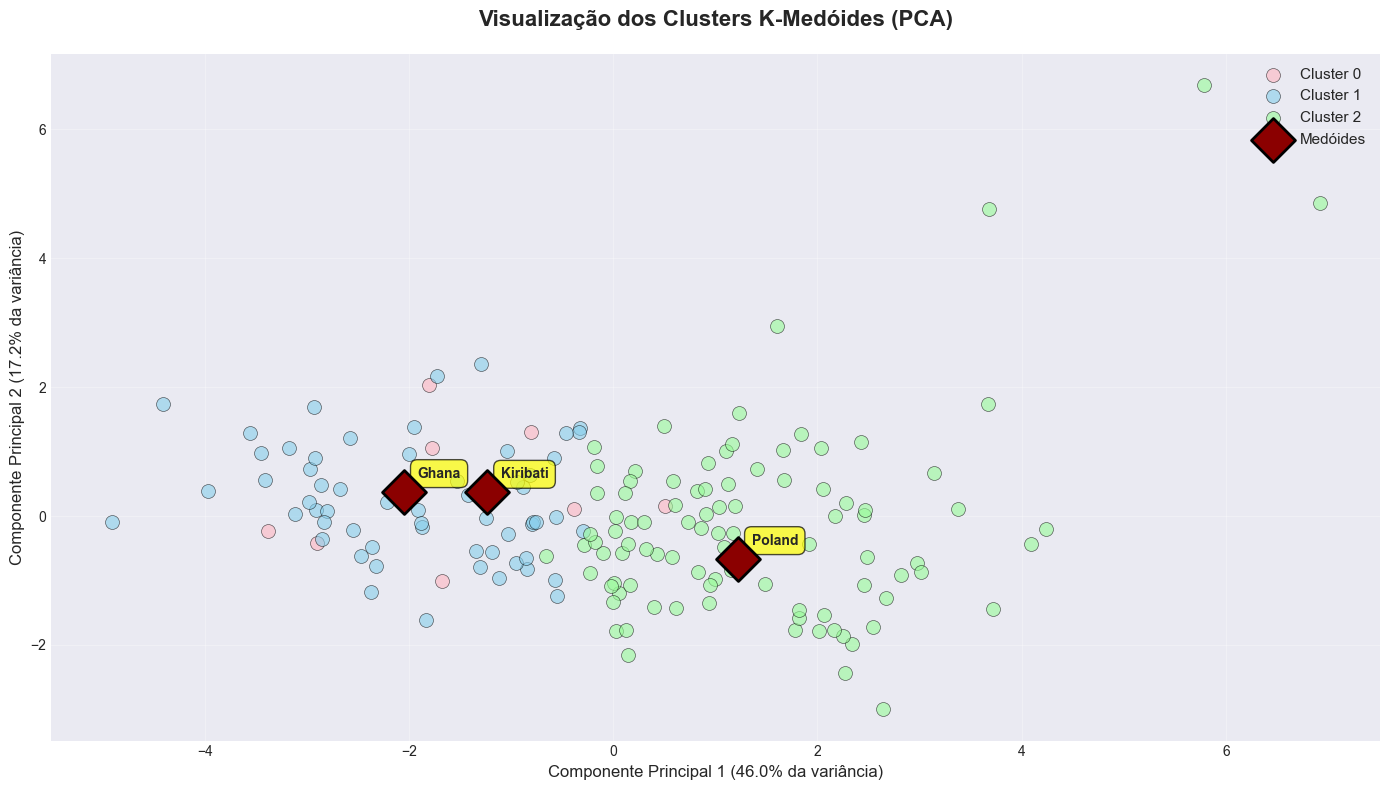

In [53]:
# Visualização dos clusters K-Medóides
plt.figure(figsize=(14, 8))

colors_kmedoids = ['#FFB6C1', '#87CEEB', '#98FB98']

for i in range(3):
    mask = labels_kmedoids == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors_kmedoids[i], label=f'Cluster {i}', 
                s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Plotar medóides
medoids_pca = X_pca[medoids_indices]
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], 
            c='darkred', marker='D', s=500, 
            edgecolors='black', linewidth=2, 
            label='Medóides', zorder=5)

# Anotar os medóides com nomes dos países
for i, idx in enumerate(medoids_indices):
    country = df.iloc[idx]['country']
    plt.annotate(country, 
                xy=(medoids_pca[i, 0], medoids_pca[i, 1]),
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=2))

plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} da variância)', fontsize=12)
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} da variância)', fontsize=12)
plt.title('Visualização dos Clusters K-Medóides (PCA)', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [54]:
# Comparação K-Means vs K-Medóides
print("\n" + "=" * 80)
print("COMPARAÇÃO: K-MEANS vs K-MEDÓIDES")
print("=" * 80)

# Concordância
ari_kmedoids = adjusted_rand_score(clusters_kmeans, labels_kmedoids)
print(f"\nAdjusted Rand Index (K-Means vs K-Medóides): {ari_kmedoids:.4f}")

# Silhouette scores
silhouette_kmedoids = silhouette_score(X_scaled, labels_kmedoids)
print(f"\nSilhouette Scores:")
print(f"  K-Means:    {silhouette_kmeans:.4f}")
print(f"  K-Medóides: {silhouette_kmedoids:.4f}")

# Características dos representantes
print("\n" + "=" * 80)
print("REPRESENTANTES DOS CLUSTERS")
print("=" * 80)
print("\nK-MEANS (Centróides - podem não ser países reais):")
print("  Os centróides são médias aritméticas, não representam países específicos")

print("\nK-MEDÓIDES (Medóides - países reais):")
for i, idx in enumerate(medoids_indices):
    country = df.iloc[idx]['country']
    print(f"  Cluster {i}: {country}")

print("\n📌 VANTAGEM DO K-MEDÓIDES:")
print("  O medóide é sempre um país real do dataset, tornando a")
print("  interpretação mais concreta e facilitando a compreensão dos clusters.")


COMPARAÇÃO: K-MEANS vs K-MEDÓIDES

Adjusted Rand Index (K-Means vs K-Medóides): 0.2979

Silhouette Scores:
  K-Means:    0.2833
  K-Medóides: 0.2368

REPRESENTANTES DOS CLUSTERS

K-MEANS (Centróides - podem não ser países reais):
  Os centróides são médias aritméticas, não representam países específicos

K-MEDÓIDES (Medóides - países reais):
  Cluster 0: Kiribati
  Cluster 1: Ghana
  Cluster 2: Poland

📌 VANTAGEM DO K-MEDÓIDES:
  O medóide é sempre um país real do dataset, tornando a
  interpretação mais concreta e facilitando a compreensão dos clusters.


## Questão 3: Sensibilidade do K-Means a Outliers

### RESPOSTA - QUESTÃO 3:

# POR QUE O K-MEANS É SENSÍVEL A OUTLIERS?

O algoritmo K-Means é sensível a outliers por várias razões fundamentais:

## 1. USO DA MÉDIA ARITMÉTICA

O K-Means calcula o centróide de cada cluster como a **média aritmética** de todos os pontos atribuídos a ele:

```
centróide = (1/n) * Σ(xi)
```

**Problema**: A média é uma estatística **não-robusta**, ou seja, é fortemente influenciada por valores extremos.

### Exemplo:
- Valores: [1, 2, 3, 4, 5] → Média = 3
- Com outlier: [1, 2, 3, 4, 100] → Média = 22

Um único outlier pode "puxar" o centróide significativamente para longe do centro real do cluster.

---

## 2. MINIMIZAÇÃO DA SOMA DOS QUADRADOS DAS DISTÂNCIAS

O K-Means minimiza a função objetivo:

```
J = Σ Σ ||xi - μj||²
```

**Problema**: Elevar a distância ao quadrado amplifica o efeito de pontos distantes.

- Ponto normal: distância = 2 → contribuição = 4
- Outlier: distância = 10 → contribuição = 100

O outlier contribui 25x mais para a função objetivo!

---

## 3. CONSEQUÊNCIAS PRÁTICAS

### a) Deslocamento dos Centróides
- Outliers "puxam" os centróides para fora do centro natural dos dados
- O cluster fica mal representado

### b) Atribuições Incorretas
- Pontos normais podem ser atraídos para o cluster do outlier
- Clusters podem ser divididos artificialmente

### c) Criação de Clusters Espúrios
- Um único outlier (ou pequeno grupo) pode formar um cluster próprio
- Clusters verdadeiros podem ser fundidos incorretamente

### d) Convergência para Mínimos Locais Ruins
- Outliers podem levar o algoritmo a soluções sub-ótimas

---

## 4. EXEMPLO ILUSTRATIVO

Imagine 3 grupos naturais de países:
- Grupo A: desenvolvidos (PIB alto, mortalidade baixa)
- Grupo B: em desenvolvimento (valores médios)
- Grupo C: subdesenvolvidos (PIB baixo, mortalidade alta)

Se houver um país outlier com PIB extremamente alto (ex: país petroleiro pequeno):
- O centróide do Grupo A é puxado para cima
- Países normais do Grupo A podem ser erroneamente agrupados com Grupo B
- O outlier pode formar um cluster próprio

---

## 5. SOLUÇÕES POSSÍVEIS

1. **Pré-processamento**: Identificar e remover/tratar outliers antes da clusterização
2. **Padronização**: Usar StandardScaler para reduzir o impacto de escalas diferentes
3. **K-Medóides**: Usar medóides em vez de centróides (mais robusto)
4. **DBSCAN**: Usar algoritmos baseados em densidade que tratam outliers como ruído
5. **Robust K-Means**: Variantes que usam estatísticas robustas (mediana)
6. **Trimmed K-Means**: Descartar uma porcentagem dos pontos mais distantes

---

## CONCLUSÃO

O K-Means é sensível a outliers porque:
- Usa a média (não-robusta)
- Eleva distâncias ao quadrado (amplifica outliers)
- Não tem mecanismo para identificar ou ignorar outliers

Para dados com outliers significativos, considere usar algoritmos mais robustos ou realizar pré-processamento adequado.

DEMONSTRAÇÃO: IMPACTO DE OUTLIERS NO K-MEANS


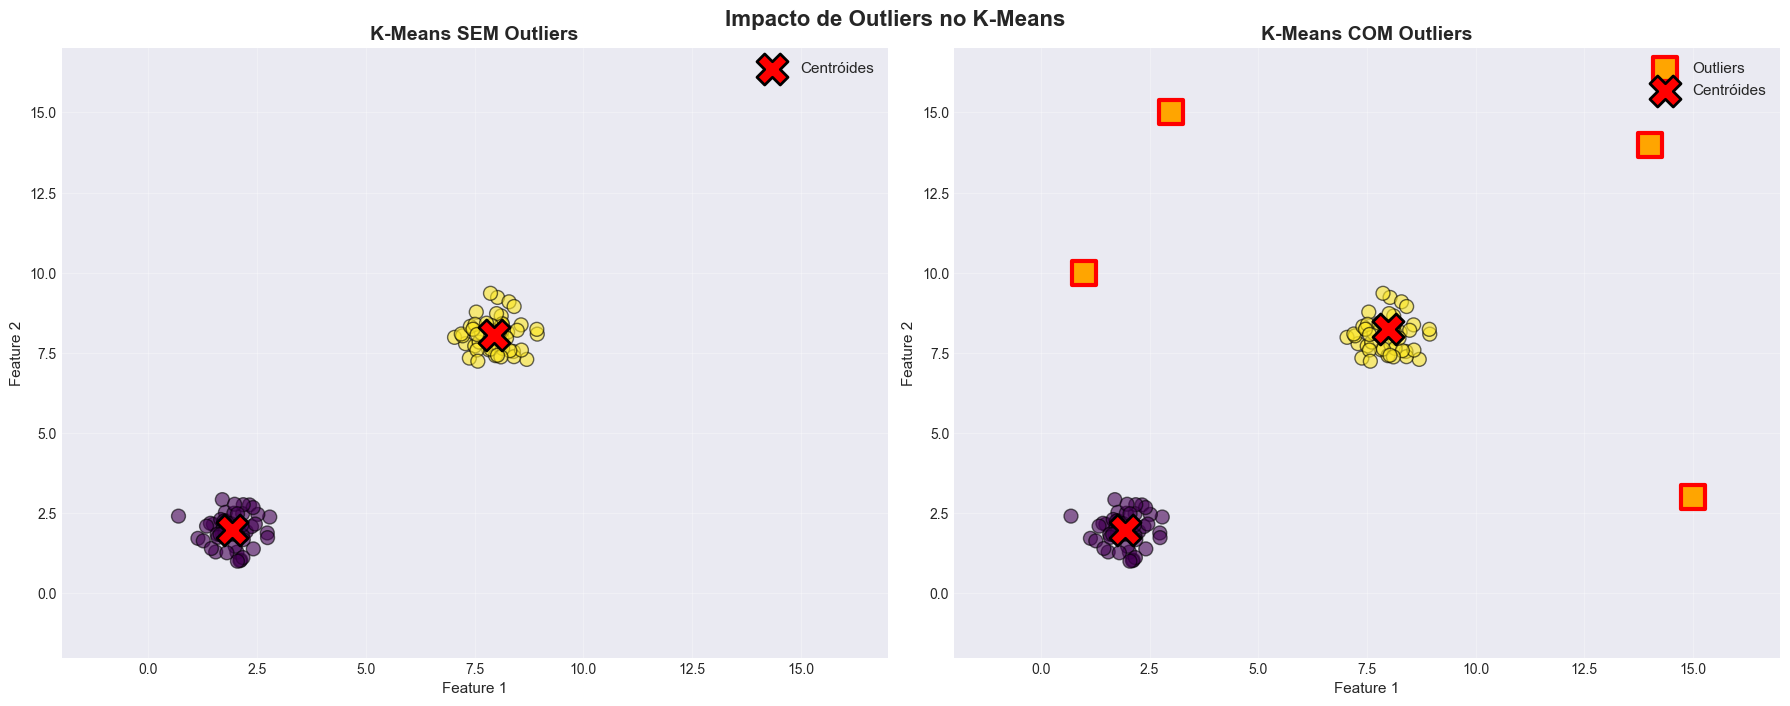


📊 OBSERVE:
  • À esquerda: clusters bem definidos, centróides no centro dos dados
  • À direita: centróides deslocados devido aos outliers (quadrados laranjas)
  • Os outliers 'puxam' os centróides para fora do centro natural dos clusters


In [55]:
# Demonstração visual da sensibilidade a outliers
print("=" * 80)
print("DEMONSTRAÇÃO: IMPACTO DE OUTLIERS NO K-MEANS")
print("=" * 80)

# Criar dataset sintético para demonstração
np.random.seed(42)

# Cluster 1: centrado em (2, 2)
cluster1 = np.random.randn(50, 2) * 0.5 + np.array([2, 2])

# Cluster 2: centrado em (8, 8)
cluster2 = np.random.randn(50, 2) * 0.5 + np.array([8, 8])

# Dados normais (sem outliers)
X_normal = np.vstack([cluster1, cluster2])

# Dados com outliers
outliers = np.array([[15, 3], [3, 15], [14, 14], [1, 10]])
X_with_outliers = np.vstack([X_normal, outliers])

# Aplicar K-Means em ambos
kmeans_normal = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_outliers = KMeans(n_clusters=2, random_state=42, n_init=10)

labels_normal = kmeans_normal.fit_predict(X_normal)
labels_outliers = kmeans_outliers.fit_predict(X_with_outliers)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Sem outliers
axes[0].scatter(X_normal[:, 0], X_normal[:, 1], 
                c=labels_normal, cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[0].scatter(kmeans_normal.cluster_centers_[:, 0], 
                kmeans_normal.cluster_centers_[:, 1],
                c='red', marker='X', s=500, edgecolors='black', linewidth=2, label='Centróides')
axes[0].set_title('K-Means SEM Outliers', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=11)
axes[0].set_ylabel('Feature 2', fontsize=11)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-2, 17)
axes[0].set_ylim(-2, 17)

# Com outliers
axes[1].scatter(X_with_outliers[:100, 0], X_with_outliers[:100, 1], 
                c=labels_outliers[:100], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[1].scatter(X_with_outliers[100:, 0], X_with_outliers[100:, 1],
                c='orange', marker='s', s=300, edgecolors='red', linewidth=3, 
                label='Outliers', zorder=5)
axes[1].scatter(kmeans_outliers.cluster_centers_[:, 0], 
                kmeans_outliers.cluster_centers_[:, 1],
                c='red', marker='X', s=500, edgecolors='black', linewidth=2, label='Centróides')
axes[1].set_title('K-Means COM Outliers', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=11)
axes[1].set_ylabel('Feature 2', fontsize=11)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-2, 17)
axes[1].set_ylim(-2, 17)

plt.tight_layout()
plt.suptitle('Impacto de Outliers no K-Means', fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("\n📊 OBSERVE:")
print("  • À esquerda: clusters bem definidos, centróides no centro dos dados")
print("  • À direita: centróides deslocados devido aos outliers (quadrados laranjas)")
print("  • Os outliers 'puxam' os centróides para fora do centro natural dos clusters")

## Questão 4: Robustez do DBSCAN a Outliers

### RESPOSTA - QUESTÃO 4:

# POR QUE O DBSCAN É MAIS ROBUSTO À PRESENÇA DE OUTLIERS?

O algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é significativamente mais robusto a outliers que o K-Means por sua natureza fundamentalmente diferente.

---

## 1. CONCEITO BASEADO EM DENSIDADE

### Diferença Fundamental:

**K-Means**:
- Baseado em **distância a centróides**
- **Todos os pontos** devem pertencer a algum cluster
- Outliers são forçados a entrar em algum cluster

**DBSCAN**:
- Baseado em **densidade local**
- Pontos em regiões de **baixa densidade** são classificados como **ruído/outliers**
- Outliers não pertencem a nenhum cluster

---

## 2. FUNCIONAMENTO DO DBSCAN

### Parâmetros:
- **ε (epsilon)**: Raio de vizinhança
- **MinPts**: Número mínimo de pontos para formar uma região densa

### Classificação de Pontos:

1. **Core Point (Ponto Núcleo)**:
   - Tem pelo menos MinPts vizinhos dentro do raio ε
   - Forma o "centro" de um cluster

2. **Border Point (Ponto de Borda)**:
   - Está na vizinhança de um core point
   - Não tem MinPts vizinhos próprios
   - Pertence ao cluster, mas na periferia

3. **Noise Point (Outlier)**:
   - Não é core point
   - Não está na vizinhança de nenhum core point
   - **Classificado como outlier/ruído**

---

## 3. POR QUE É ROBUSTO A OUTLIERS?

### a) Detecção Automática de Outliers
- DBSCAN **identifica** outliers como parte do processo
- Outliers recebem label -1 (não pertencem a nenhum cluster)
- Não são forçados a entrar em clusters onde não pertencem

### b) Não Usa Médias ou Centróides
- Não calcula centróides que podem ser distorcidos
- Usa apenas contagem de vizinhos e distâncias locais
- Outliers não influenciam a formação dos clusters

### c) Baseado em Densidade Local
- Clusters são definidos por regiões densas
- Outliers isolados têm baixa densidade
- A densidade é uma propriedade local, não global

### d) Forma Arbitrária de Clusters
- Não assume clusters esféricos (como K-Means)
- Pode encontrar clusters de qualquer forma
- Mais flexível e adaptável aos dados reais

---

## 4. VANTAGENS SOBRE K-MEANS

| Aspecto | K-Means | DBSCAN |
|---------|---------|--------|
| **Outliers** | Forçados em clusters | Identificados como ruído |
| **Forma dos clusters** | Esférica | Arbitrária |
| **Número de clusters** | Deve ser especificado | Descoberto automaticamente |
| **Sensibilidade** | Alta a outliers | Robusta a outliers |
| **Centróides** | Usa (afetados por outliers) | Não usa |
| **Densidade** | Ignora | Fundamental |

---

## 5. EXEMPLO PRÁTICO

### Cenário:
Dataset de países com 3 outliers:
- País A: PIB extremamente alto (país petroleiro pequeno)
- País B: Mortalidade infantil anormalmente alta (guerra)
- País C: Combinação única de características

### Resultado:

**K-Means**:
- Países A, B, C são forçados a entrar em algum cluster
- Distorcem os centróides dos clusters
- Podem atrair outros países erroneamente

**DBSCAN**:
- Países A, B, C são classificados como ruído
- Não afetam a formação dos clusters principais
- Clusters representam grupos densos e naturais

---

## 6. LIMITAÇÕES DO DBSCAN

Apesar das vantagens:

1. **Escolha de Parâmetros**: ε e MinPts devem ser escolhidos adequadamente
2. **Densidades Variáveis**: Dificuldade com clusters de densidades muito diferentes
3. **Alta Dimensionalidade**: Pode ter dificuldade em espaços de alta dimensão
4. **Desempenho**: Pode ser mais lento que K-Means em datasets grandes

---

## 7. QUANDO USAR DBSCAN?

Use DBSCAN quando:
- ✓ Há presença de outliers que devem ser identificados
- ✓ Clusters têm formas arbitrárias (não esféricas)
- ✓ Não se sabe o número de clusters a priori
- ✓ Clusters têm densidades similares
- ✓ Importa separar "ruído" de dados válidos

---

## CONCLUSÃO

O DBSCAN é mais robusto a outliers porque:

1. **Identifica outliers explicitamente** como ruído
2. **Não usa estatísticas sensíveis** como média
3. **Baseia-se em densidade local**, não distância global
4. **Não força todos os pontos** a pertencer a clusters
5. **Isola outliers** sem afetar a formação dos clusters principais

Essa robustez torna o DBSCAN ideal para dados reais que frequentemente contêm outliers, ruído e clusters de formas irregulares.

DEMONSTRAÇÃO: K-MEANS vs DBSCAN COM OUTLIERS

DBSCAN:
  Clusters encontrados: 2
  Outliers detectados: 4


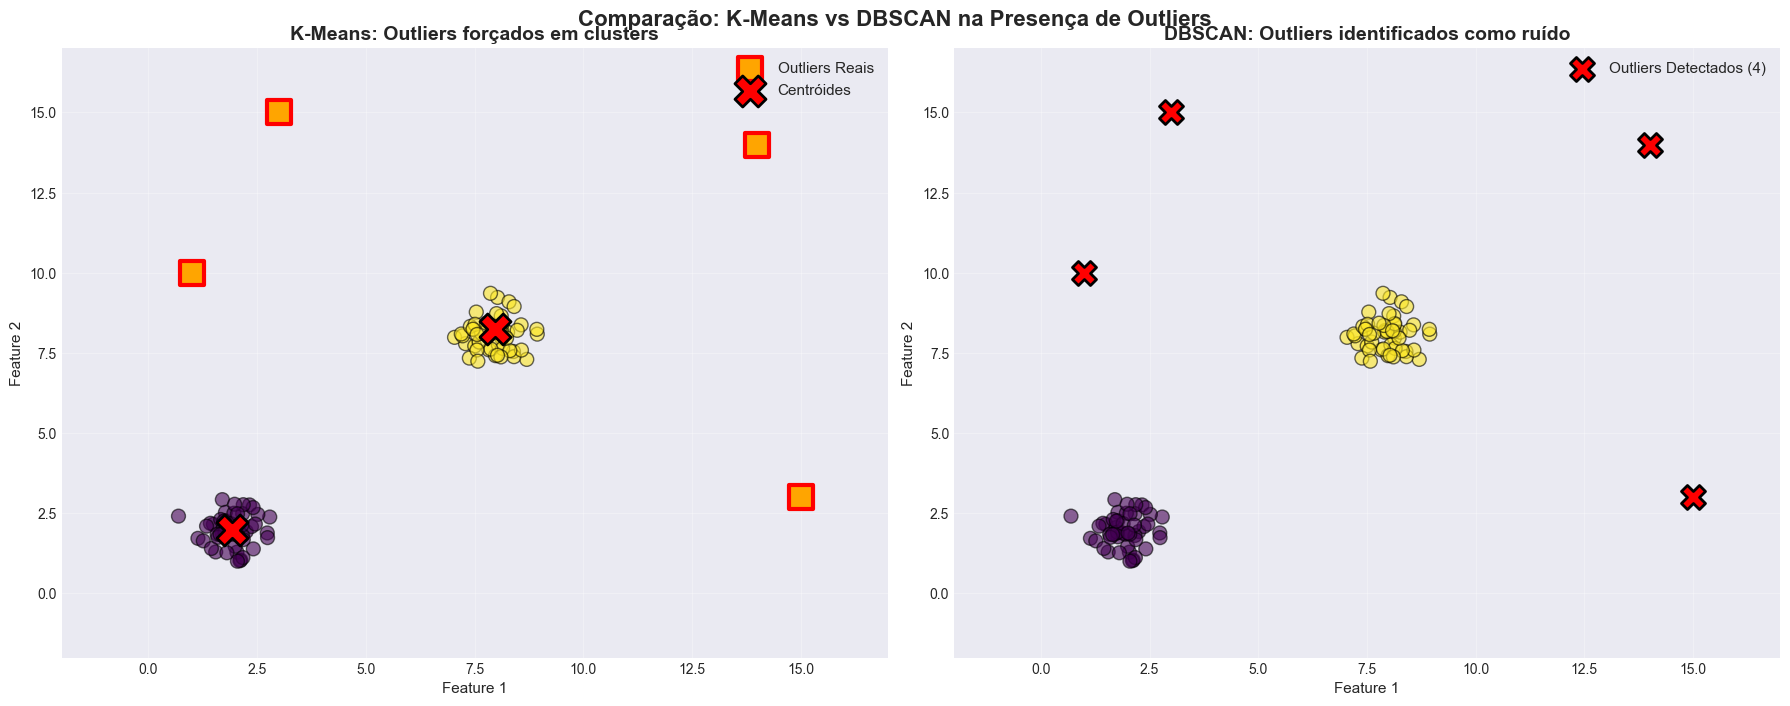


📊 CONCLUSÃO:
  • K-Means: Todos os pontos são atribuídos a clusters, inclusive outliers
  • DBSCAN: Outliers são identificados e marcados com X vermelho
  • DBSCAN protege os clusters principais da influência dos outliers
  • DBSCAN é mais apropriado quando há ruído/outliers nos dados


In [57]:
# Demonstração comparativa: K-Means vs DBSCAN com outliers
from sklearn.cluster import DBSCAN

print("=" * 80)
print("DEMONSTRAÇÃO: K-MEANS vs DBSCAN COM OUTLIERS")
print("=" * 80)

# Usar os dados sintéticos criados anteriormente
# X_with_outliers já contém clusters + outliers

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_with_outliers)

# Contar outliers
n_outliers_dbscan = np.sum(labels_dbscan == -1)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

print(f"\nDBSCAN:")
print(f"  Clusters encontrados: {n_clusters_dbscan}")
print(f"  Outliers detectados: {n_outliers_dbscan}")

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# K-Means
axes[0].scatter(X_with_outliers[:100, 0], X_with_outliers[:100, 1], 
                c=labels_outliers[:100], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
axes[0].scatter(X_with_outliers[100:, 0], X_with_outliers[100:, 1],
                c='orange', marker='s', s=300, edgecolors='red', linewidth=3, 
                label='Outliers Reais', zorder=5)
axes[0].scatter(kmeans_outliers.cluster_centers_[:, 0], 
                kmeans_outliers.cluster_centers_[:, 1],
                c='red', marker='X', s=500, edgecolors='black', linewidth=2, label='Centróides')
axes[0].set_title('K-Means: Outliers forçados em clusters', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=11)
axes[0].set_ylabel('Feature 2', fontsize=11)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-2, 17)
axes[0].set_ylim(-2, 17)

# DBSCAN
# Plotar pontos normais (não-outliers)
mask_normal = labels_dbscan != -1
axes[1].scatter(X_with_outliers[mask_normal, 0], X_with_outliers[mask_normal, 1], 
                c=labels_dbscan[mask_normal], cmap='viridis', s=100, alpha=0.6, edgecolors='black')

# Plotar outliers detectados
mask_outliers = labels_dbscan == -1
axes[1].scatter(X_with_outliers[mask_outliers, 0], X_with_outliers[mask_outliers, 1],
                c='red', marker='X', s=300, edgecolors='black', linewidth=2, 
                label=f'Outliers Detectados ({n_outliers_dbscan})', zorder=5)

axes[1].set_title('DBSCAN: Outliers identificados como ruído', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=11)
axes[1].set_ylabel('Feature 2', fontsize=11)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-2, 17)
axes[1].set_ylim(-2, 17)

plt.tight_layout()
plt.suptitle('Comparação: K-Means vs DBSCAN na Presença de Outliers', 
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("\n📊 CONCLUSÃO:")
print("  • K-Means: Todos os pontos são atribuídos a clusters, inclusive outliers")
print("  • DBSCAN: Outliers são identificados e marcados com X vermelho")
print("  • DBSCAN protege os clusters principais da influência dos outliers")
print("  • DBSCAN é mais apropriado quando há ruído/outliers nos dados")

---

## Resumo do Trabalho

Este trabalho abordou de forma completa a análise e clusterização de dados socioeconômicos de países:

### ✓ Parte 1 - Infraestrutura
- Ambiente Python 3.9+ configurado
- Bibliotecas necessárias instaladas
- Requirements.txt criado

### ✓ Parte 2 - Análise Exploratória
- Dataset com 167 países analisado
- Visualizações de faixa dinâmica criadas
- Pré-processamento realizado (padronização)

### ✓ Parte 3 - Clusterização
- **K-Means**: 3 clusters identificados, interpretados e visualizados
- **Hierárquica**: Dendrograma criado e analisado
- **Comparação**: Semelhanças e diferenças documentadas

### ✓ Parte 4 - Questões Teóricas
- Etapas do K-Means explicadas
- K-Medóides implementado do zero
- Sensibilidade a outliers demonstrada
- Robustez do DBSCAN explicada e demonstrada

---

**Obrigado!**